In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')
plt.rcParams['axes.facecolor']='w'
plt.rcParams['axes.edgecolor'] = '#D6D6D6'
plt.rcParams['axes.linewidth'] = 2

$$
\newcommand\bs[1]{\boldsymbol{#1}}
$$

# Preprocessing data for deep learning

The goal of this post is to dive into basic preprocessing techniques used for deep learning.

Like with my previous posts/notebooks the goal is to use code (Python) to understand better abstract mathematical notions! Thinking with code

The goal of this notebook is to start with basic concepts used in data science and machine learning/deep learning like variance and covariance matrix and go further to some preprocessing techniques. The idea is to get more concrete insights about mathematical concepts using code to actually see what each equation is doing!

We call preprocessing all the transformations on the raw data before it is fed to the machine learning or deep learning algorithm. For instance, if you want to train a convolutional neural network on images using images without transformation would lead to bad classification performances [1].

Here we will see the basics of some preprocessing techniques using Python/Numpy/Matplotlib like:

- Mean normalization
- Standardization
- Whitening

But the first step will be get you some reminders or intuitions (get your hands dirty and try the codes we will use!) about variance and covariance.

## 1. Variance and covariance

### Variance

The variance of a variable gives its variability and the covariance is a measure that tells the amount of dependency between two variables. A positive covariance means that values of the first variable are large when values of the second variables are large as well. A negative covariance means the opposite: large values from one variable are associated with small values of the other. The covariance value depends on the scale of the variable so it is hard to analyse. We generally use the correlation coefficient that is easier to interpret. It is the covariance normlized.

The covariance matrix is a matrix that summarizes the variances and covariances of a set of vectors. The diagonal corresponds to the variance of each vector:

<img src="images/covariance1.png" width="400" alt="Variance in the matrix of covariance" title="Variance in the matrix of covariance is on the diagonal">
<em>Matrix of covariance. The diagonal corresponds to the variance of each column vector.</em>

Let's just check with the formula of the variance:

$$
V(\bs{X}) = \frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})^2
$$

with $n$ the length of the vector and $\bar{x}$ the mean of the vector. So the variance of the first column vector of $\bs{A}$ is:

$$
V(\bs{A}_{:,1}) = \frac{(1-3)^2+(5-3)^2+(3-3)^2}{3} = 2.67
$$

This is what we have as the first cell in our covariance matrix. The second element on the diagonal correspond of the variance of the second column vector from $\bs{A}$ and so on.

The other cells correspond to the covariance between two column vectors from $\bs{A}$. For instance, the covariance between the first and the third column is located in the covariance matrix as the column 1 and the row 3 (or the column 3 and the row 1).

<img src="images/covariance2.png" width="400" alt="Covariance in the matrix of covariance" title="The position in the covariance matrix.">
<em>The position in the covariance matrix. Column corresponds to the first variable and row to the second (or the opposite). The covariance between the first and the third column vector of $\bs{A}$ is the element in the column 1 and row 3 (or the opposite = same value).</em>


Let's check that the covariance between the first and the third column vector of $\bs{A}$ is equal to $-2.67$. The formula of the covariance between two variables $\bs{X}$ and $\bs{Y}$ is:

$$
cov(\bs{X},\bs{Y}) = \frac{1}{n} \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})
$$

The variables $\bs{X}$ and $\bs{Y}$ are the first and the third column vectors in the last example. Let's split this formula to be sure that it is crystal clear:

1. $(x_1-\bar{x})$. The sum symbol means that we will iterate on the elements of the vectors. We will start with the first element ($i=1$) and calculate the first element of $\bs{X}$ minus the mean of the vector $\bs{X}$.
2. $(x_1-\bar{x})(y_1-\bar{y})$. Multiply the result with the first element of $\bs{Y}$ minus the mean of the vector $\bs{Y}$.
3. $\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})$. Reiterate the process for each element of the vectors and calculate the sum of all results.
4. $\frac{1}{n} \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})$. Divide by the number of element in the vector.


#### Example 1.

These variables can be in a matrix.

$
\boldsymbol{A}=
\begin{bmatrix}
    1 & 3 & 5\\\\
    5 & 4 & 1\\\\
    3 & 8 & 6
\end{bmatrix}
$

We will calculate the covariance the first and the third column vectors:

$\boldsymbol{X} = \begin{bmatrix}
    1\\\\
    5\\\\
    3
\end{bmatrix}
$ and $\boldsymbol{Y} = \begin{bmatrix}
    5\\\\
    1\\\\
    6
\end{bmatrix}$. So $\boldsymbol{\bar{x}}=3$, $\boldsymbol{\bar{y}}=4$ and $n=3$.

$cov(X,Y) = \frac{(1-3)(5-4)+(5-3)(1-4)+(3-3)(6-4)}{3}=\frac{-8}{3}=-2.67$

Ok, great! Now the easy way! In python/Numpy the covariance matrix can be calculated with the function `np.cov`. It is worth noting that if you want Numpy to use the columns as vectors, the parameter `rowvar=False` has to be used. Also, `bias=True` allow to divide by $n$ and not by $n-1$:

In [61]:
A = np.array([[1, 3, 5], [5, 4, 1], [3, 8, 6]])
A

array([[1, 3, 5],
       [5, 4, 1],
       [3, 8, 6]])

In [62]:
np.cov(A, rowvar=False, bias=True)

array([[ 2.66666667,  0.66666667, -2.66666667],
       [ 0.66666667,  4.66666667,  2.33333333],
       [-2.66666667,  2.33333333,  4.66666667]])

### Finding the covariance matrix with the dot product

There is another way to compute the covariance matrix of $\bs{A}$ is to center $
\bs{A}$ around 0 (subtract the mean of the vector to each element of the vector to have a vector of mean equal to 0), multiply it with its own transpose and divide by the number of observation. Here is an implementation:

In [63]:
def calculateCovariance(X):
    meanX = np.mean(X, axis = 0)
    lenX = X.shape[0]
    X = X - meanX
    covariance = X.T.dot(X)/lenX
    return covariance

Let's test it on our matrix $\boldsymbol{A}$:

In [64]:
calculateCovariance(A)

array([[ 2.66666667,  0.66666667, -2.66666667],
       [ 0.66666667,  4.66666667,  2.33333333],
       [-2.66666667,  2.33333333,  4.66666667]])

We end up with the same results as before!

The explanation is simple. The dot product between two vectors can be expressed:

$$
\bs{X^\text{T}Y}= \sum_{i=1}^{n}(x_i)(y_i)
$$

with $n$ the number of elements in our vectors. If we divide by $n$ as we have seen:

$$
\frac{1}{n}\bs{X^\text{T}Y}= \frac{1}{n}\sum_{i=1}^{n}(x_i)(y_i)
$$

You can note that this is not too far from the formula of the covariance we have see above:

$$
cov(\bs{X},\bs{Y}) = \frac{1}{n} \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})
$$

The only difference is that in the covariance formula we substract the mean of a vector to each of its elements. This is why we need to do it before the dot product (and have zero-centered vectors) in the vectorized form.

Now if we have a matrix $\bs{A}$, the dot product between $\bs{A}$ and its transpose will give you a new matrix:

<img src="images/covariance-dot-product.png" width="400" alt="Covariance matrix and dot product" title="Covariance matrix and dot product.">
<em>If you start with a 0-centered matrix, the dot product between this matrix and its transpose will give you variance of each vector and covariance between them, that is to say the covariance matrix.</em>


### Visualise data and covariance matrices

In order to get more insights about the covariance matrix and how it will be usefull, we will create a function used to visualise it along with 2D data. You will be able to see the link between the covariance matrix and the data.

This function will calculate the covariance matrix as we have seen above. It will create two subplots: one for the covariance matrix and one for the data. The `heatmap` function from Seeborn is used to create gradients of color: small values will be colored in light green and large values in dark blue. The data is represented as a scatterplot. We choose one of our palette colors, but you may prefer other colors 🌈.

In [46]:
def plotDataAndCov(data):
    ACov = np.cov(data, rowvar=False, bias=True)
    print 'Covariance matrix:\n', ACov

    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(10, 10)

    ax0 = plt.subplot(2, 2, 1)
    cmap = sns.color_palette("GnBu", 10)
    sns.heatmap(ACov, cmap=cmap, vmin=0)

    ax1 = plt.subplot(2, 2, 2)
    if data.shape[1]==3:
        c=data[:,2]
    else:
        c="#0A98BE"
    ax1.scatter(data[:,0], data[:,1], c=c, s=40)

    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

## 2. Simulating data

### Uncorrelated data

Now that we have the plot function, we will generate some random data to visualize what the covariance matrices can tell us. We will start with data drawn from a normal distribution with the Numpy function `np.random.normal()`.

<img src="images/np.random.normal.png" width="400" alt="Parameters of numpy random normal" title="Parameters of Numpy random normal.">
<em>Drawing sample from a normal distribution with Numpy.</em>

This function need the mean, the standard deviation and the number of observations as input. We will create two random variables of 300 observations and standard deviation of 1, one with a mean of 1 and one with a mean of 2. If we draw two times 300 observations from a normal distribution, both vectors will be uncorrelated.

Note 1:  We transpose the data with `.T` because the original shape is (2, 300) and we want the number of observations as rows (shape (300, 2)).

Note 2: We use `np.random.seed` function for reproducibility. The same random number will be used the next time we run the cell!

In [66]:
np.random.seed(1234)
a1 = np.random.normal(2, 1, 300)
a2 = np.random.normal(1, 1, 300)
A = np.array([a1, a2]).T
A.shape

(300, 2)

Let's check how the data looks like:

In [67]:
A[:10,:]

array([[ 2.47143516,  1.52704645],
       [ 0.80902431,  1.7111124 ],
       [ 3.43270697,  0.78245452],
       [ 1.6873481 ,  3.63779121],
       [ 1.27941127, -0.74213763],
       [ 2.88716294,  0.90556519],
       [ 2.85958841,  2.43118375],
       [ 1.3634765 ,  1.59275845],
       [ 2.01569637,  1.1702969 ],
       [-0.24268495, -0.75170595]])

Now, we can check that the distributions are normal:

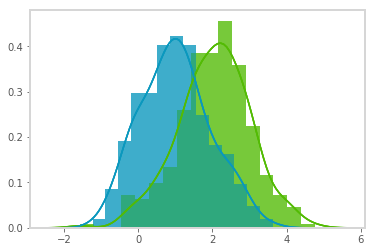

In [79]:
sns.distplot(A[:,0], color="#53BB04")
sns.distplot(A[:,1], color="#0A98BE")
plt.show()
plt.close()

Looks good! We can see that the distributions have equivalent standard deviations but different means (1 and 2). So that's exactly what we have asked for! 🌵

Now we can plot the data set and its covariance matrix with our function:

Covariance matrix:
[[ 0.95171641 -0.0447816 ]
 [-0.0447816   0.87959853]]


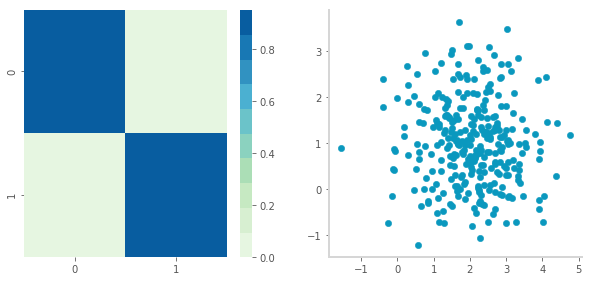

In [102]:
plotDataAndCov(A)
plt.show()
plt.close()

We can see on the scatterplot that the two dimensions are uncorrelated. Note that we have one dimension with a mean of 1 and the other with the mean of 2. Also, the covariance matrix shows that the variance of each variable is very large (around 1) and the covariance of columns 1 and 2 is very small (around 0). Since we insured that the two vectors are independant this is coherent (the oposite is not necessarly true: a covariance of 0 doesn't guaranty independancy (see [here](https://stats.stackexchange.com/questions/12842/covariance-and-independence)).

### Correlated data

Now, let's construct dependant data by specifying one column from the other one.

Covariance matrix:
[[ 0.95171641  0.92932561]
 [ 0.92932561  1.12683445]]


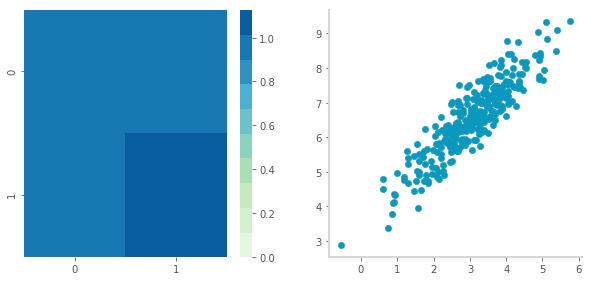

In [84]:
np.random.seed(1234)
b1 =  np.random.normal(3, 1, 300)
b2 = b1 + np.random.normal(7, 1, 300)/2.
B = np.array([b1, b2]).T
plotDataAndCov(B)
plt.show()
plt.close()

The correlation between the two dimensions is visible on the scatter plot. We can see that a line could be drawn and used to predict $\boldsymbol{y}$ from $\boldsymbol{x}$ and vice versa. The covariance matrix is not diagonal (there is non-zero cells outside of the diagonal). That means that the covariance between dimensions is non-zero.

That's great! ⚡️ We now have all the tools to see different preprocessing techniques.

## 3. Mean normalization

Mean normalization is just removing the mean from each observation.

$$
\bs{X'} = \bs{X} - \bar{\bs{X}}
$$

where $\bs{X'}$ is the normalized dataset, $\bs{X}$ the original dataset and $\bar{\bs{X}}$ the mean of $\bs{X}$.

It will have the effect of centering the data around 0. We will create the function `centerData()` to do that:

In [4]:
def center(X):
    newX = X - np.mean(X, axis = 0)
    return newX

Let's give a try with the matrix $\bs{B}$ we have just created:

Covariance matrix:
[[ 0.95171641  0.92932561]
 [ 0.92932561  1.12683445]]


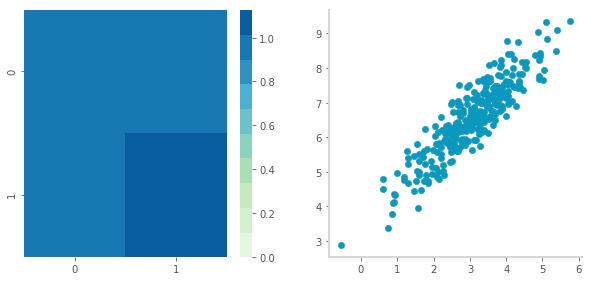

Covariance matrix:
[[ 0.95171641  0.92932561]
 [ 0.92932561  1.12683445]]


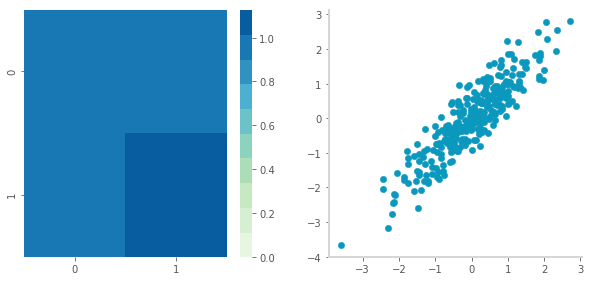

In [87]:
BCentered = center(B)

plotDataAndCov(B)
plt.show()
plt.close()

plotDataAndCov(BCentered)
plt.show()
plt.close()

The first plots show again the original data $\bs{B}$ and the second plots show the centered data (look at the scale).

## 4. Standardization or normalization

The standardization is used to give all features the same scale. The way to do it is to divide each zero-centered dimension by its standard deviation.

$$
\bs{X'} = \frac{\bs{X} - \bar{\bs{X}}}{\sigma_{\bs{X}}}
$$

where $\bs{X'}$ is the standardized dataset, $\bs{X}$ the original dataset, $\bar{\bs{X}}$ the mean of $\bs{X}$ and $\sigma_{\bs{X}}$ the standard deviation of $\bs{X}$.

In [88]:
def standardize(X):
    newX = center(X)/np.std(X, axis = 0)
    return newX

Let's create another dataset with different scale to check that it is working.

Covariance matrix:
[[ 0.95171641  0.88454402]
 [ 0.88454402  2.79646831]]


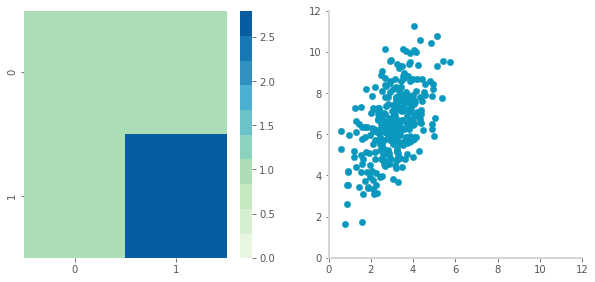

In [89]:
np.random.seed(1234)
c1 =  np.random.normal(3, 1, 300)
c2 = c1 + np.random.normal(7, 3, 300)/2.
C = np.array([c1, c2]).T

plotDataAndCov(C)
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.show()
plt.close()


We can see that the scales of $x$ and $y$ are different. Now let's standardize it:

Covariance matrix:
[[ 1.          0.54220151]
 [ 0.54220151  1.        ]]


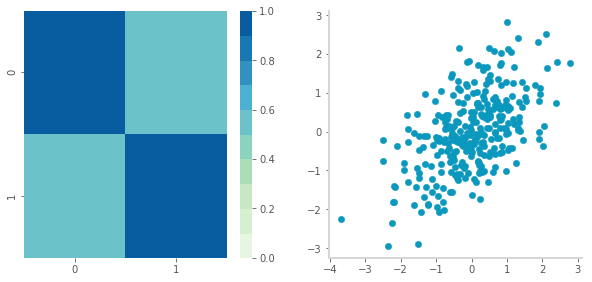

In [90]:
CStandardized = standardize(C)

plotDataAndCov(CStandardized)
plt.show()
plt.close()

Lookd good! You can see that the scales are the same and that the dataset is 0-centered according to both axes. Now, have a look to the covariance matrix: you can see that the variance of each coordinate (the top-left cell and the bottom-right cell) are equal to 1. By the way, this new covariance matrix is actually the correlation matrix!💥 The Pearson correlation coefficient between the two variables ($\bs{c1}$ and $\bs{c2}$) is 0.54220151.

## 5. Whitening

Whitening is a bit more complicated. It will involve the following steps:

    1- Zero-center the data
    2- Decorrelated the data
    3- Whiten the data
    
Let's take again $\bs{C}$ and try to do these steps.

#### 1. Zero-centering

Covariance matrix:
[[ 0.95171641  0.88454402]
 [ 0.88454402  2.79646831]]


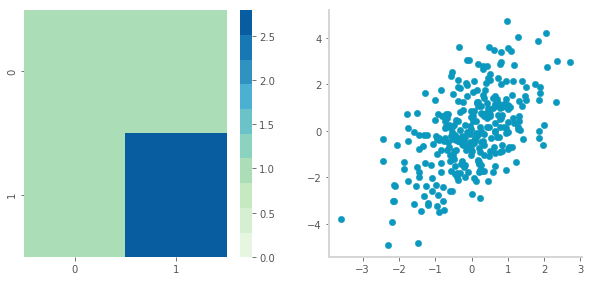

In [91]:
CCentered = center(C)

plotDataAndCov(CCentered)
plt.show()
plt.close()

#### 2. Decorrelate

At this point, we need to decorrelate our data. Intuitively, it means that we want to rotate our data until there is no correlation anymore. Look at the following schema to see what I mean:

<img src="images/rotation.png" width="400" alt="Rotation to decorrelate the data" title="The rotation can decorrelate the data.">
<em>The left plot shows correlated data. For instance, if you take a data point with a big $x$ value, chances are that $y$ will also be quite big. Now take all data points and do a rotation (maybe around 45 degrees counter clock wise): the new data (plotted on the right) is not correlated anymore.</em>

The question is: how would we find the right rotation in order to get uncorrelated data? Actually, it is exactly what the **eigenvectors** do: they indicate the direction where the spread of the data is at its maximum:

<img src="images/maxVar.png" width="300" alt="Direction where the variance is maximum" title="There is one direction where the variance is maximum.">
<em>The eigenvectors give you the direction that maximizes the variance. The direction of the green line is where the variance is maximum. Just look at the smallest and largest point projected on this line: the spread is big. Compare that with the projection on the orange line: the spread is very small.</em>

For more details about the eigendecomposition, see [this post](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.7-Eigendecomposition/).

So we can decorrelate the data by projecting it on the eigenvectors basis. This will have the effect to apply the rotation needed and remove correlations between the dimensions. Here are the steps:

    1- Calculate the covariance matrix
    2- Calculate the eigenvectors of the covariance matrix
    3- Apply the matrix of eigenvectors on the data (this will rotate the data)
    
Let's pack that into a function:

In [3]:
def decorrelate(X):
    cov = X.T.dot(X)
    eigVals, eigVecs = np.linalg.eig(cov)
    decorrelated = X.dot(eigVecs)
    return decorrelated

Let's try to decorrelate our zero-centered matrix $\bs{C}$ to see it in action:

Covariance matrix:
[[ 0.95171641  0.88454402]
 [ 0.88454402  2.79646831]]


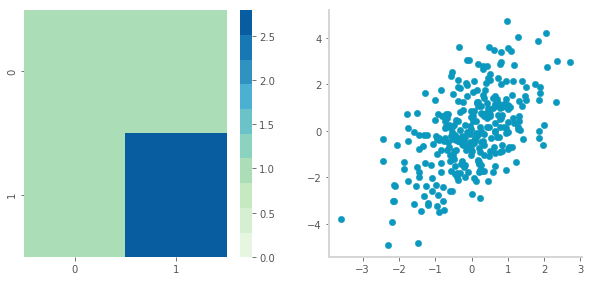

Covariance matrix:
[[  5.96126981e-01  -2.36847579e-17]
 [ -2.36847579e-17   3.15205774e+00]]


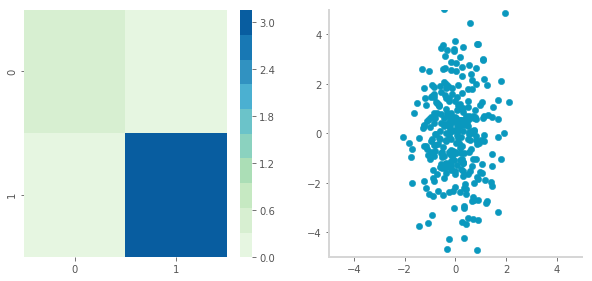

In [93]:
plotDataAndCov(CCentered)
plt.show()
plt.close()

CDecorrelated = decorrelate(CCentered)
plotDataAndCov(CDecorrelated)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()
plt.close()

Nice! This is working 🎄

We can see that the correlation is not here anymore and that the covariance matrix (now a diagonal matrix) confirms that the covariance between the two dimensions are equal to 0.

#### 3. Whiten the data

The next step is to scale the uncorrelated matrix in order to obtain a covariance matrix corresponding to the identity matrix (ones on the diagonal and zeros on the other cells; see [this post](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.3-Identity-and-Inverse-Matrices/)). To do that we scale our decorrelated data by dividing each dimension by the square-root of its corresponding eigenvalue.

In [2]:
def whiten(X):
    cov = X.T.dot(X)/float(X.shape[0])
    eigVals, eigVecs = np.linalg.eig(cov)
    decorrelated = X.dot(eigVecs)
    whitened = decorrelated / np.sqrt(eigVals + 1e-5)
    return whitened

*Note:* we add a small value (here $10^{-5}$) to avoid the division by $0$.

Covariance matrix:
[[  9.99983225e-01  -1.06581410e-16]
 [ -1.06581410e-16   9.99996827e-01]]


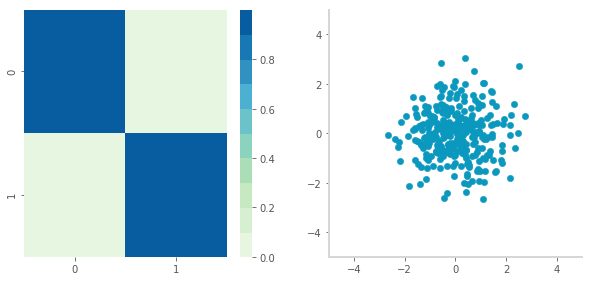

In [95]:
CWhitened = whiten(CCentered)
# whitened_B_cov = whitened_B.T.dot(whitened_B)/whitened_B.shape[0]

# CDecorrelated = decorrelate(CCentered)
plotDataAndCov(CWhitened)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()
plt.close()

We can see that with the covariance matrix that this is all good. We have something that really looks to the identity matrix ($1$ on the diagonal and $0$ elsewhere).

# References

[CS231 - Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/neural-networks-2/)

[Dustin Stansbury - The Clever Machine](https://theclevermachine.wordpress.com/2013/03/30/the-statistical-whitening-transform/)

[SO - Image whitening in Python](https://stackoverflow.com/questions/41635737/is-this-the-correct-way-of-whitening-an-image-in-python)

[1] [K. K. Pal and K. S. Sudeep, “Preprocessing for image classification by convolutional neural networks,” in 2016 IEEE International Conference on Recent Trends in Electronics, Information Communication Technology (RTEICT), 2016, pp. 1778–1781.](https://ieeexplore.ieee.org/document/7808140/)

[A. Krizhevsky and G. Hinton, “Learning multiple layers of features from
tiny images,” 2009. ](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.222.9220&rep=rep1&type=pdf)

[Mean normalization per image or from the entire dataset](http://ufldl.stanford.edu/wiki/index.php/Data_Preprocessing)

[Mean subtraction - all images or per image?](https://stackoverflow.com/questions/29743523/subtract-mean-from-image)

[Why centering is important - See section 4.3](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)


- voir local contrast normalization: K. Jarrett, K. Kavukcuoglu, M. A. Ranzato, and Y. LeCun. What is the best multi-stage architecture for
object recognition? In International Conference on Computer Vision, pages 2146–2153. IEEE, 2009.

# Image whitening

We will see how whitening can be apply to preprocess image dataset. To do so we will use the paper of Pal & Sudeep (2016) where they give some details about the process. This preprocessing technique is called Zero component analysis (ZCA).

We will load images from the CIFAR dataset. This dataset is available from Keras but you can also dowload it [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [2]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape

Using TensorFlow backend.


(50000, 32, 32, 3)

The training set of the CIFAR10 dataset contains 50000 images. The shape of `X_train` is (50000, 32, 32, 3). Each image is 32px by 32px and each pixel contains 3 dimensions (R, G, B). Each value is the brightness of the corresponding color between 0 and 255.

We will start by selecting only a subset of the images, let's say 1000:

In [33]:
X = X_train[:1000]
print X.shape

(1000, 32, 32, 3)


That's better! Now we will reshape the array to have flat image data with one image per row. Each image will be (1, 3072) because $32 \times 32 \times 3 = 3072$. Thus, the array containing all images will be (10000, 3072):

In [34]:
X = X.reshape(1000, 3072)
print X.shape

(1000, 3072)


The next step is to be able to see the images. The function `imshow()` from Matplotlib ([doc](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html)) can be used to show images. It needs images with the shape ($M \times N \times 3$):

In [35]:
def plotImage(X):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(X.reshape(32,32,3))
    plt.show()
    plt.close()

For instance, let's plot one of the images we have loaded (the number 12):

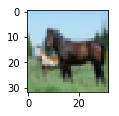

In [36]:
plotImage(X[12, :])

Nice 🌵

We can now implement the whitening of the images. We will use the paper of [Pal & Sudeep (2016)](https://sci-hub.tw/10.1109/RTEICT.2016.7808140) where they describe the process. The first step is to rescale the images to obtain range [0, 1] by dividing by 255 (the maximum value of the pixels). Remind that the formula to obtain the range [0, 1] is:

$$\frac{data - min(data)}{max(data) - min(data)}$$

but here, the minimum value is 0, so this leads to:

$$\frac{data}{max(data)} = \frac{data}{255}$$

In [37]:
X = X / 255.
print 'X.min()', X.min()
print 'X.max()', X.max()

X.min() 0.0
X.max() 1.0


Ok cool, the range of our pixel values are between 0 and 1 now. The next step is to subtract the mean from all image. Be carreful here: one way to do it is to take each image and remove the mean of this image to every pixel of that image. The intuition to do that is that the pixels of each image is centered around 0. Another way to do it is to each of the 3072 pixels we have for every image and subtract the mean of that pixel across all images. This is called `per-pixel mean subtraction`. This time, each pixel will be centered around 0. When you will feed your network with the images, each pixel could be a different feature. With the per-pixel mean subtraction, we have centered each feature around 0.

We will now do the per-pixel mean subtraction from our 1000 images. Our data are organised with these dimensions (images, pixels). It was (1000, 3072) because there are 1000 images with $32 \times 32 \times 3 = 3072$ pixels. The mean per-pixel can be obtain from the first axis:

In [29]:
X.mean(axis=0).shape

(3072,)

This gives us 3072 values which is the number of mean per pixel. Let's see the kind of values we have:

In [38]:
X.mean(axis=0)

array([ 0.5234    ,  0.54323137,  0.5274    , ...,  0.50369804,
        0.50011765,  0.45227451])

This is near 0.5 because we already have normalised to the range [0, 1]. However, we still need to remove the mean from each pixel:

In [39]:
X = X - X.mean(axis=0)

Just to convince ourselve that it worked, we will compute the mean of the first pixel. Let's hope that it is 0.

In [40]:
X.mean(axis=0)

array([ -5.30575583e-16,  -5.98021632e-16,  -4.23439062e-16, ...,
        -1.81965554e-16,  -2.49800181e-16,   3.98570066e-17])

This is not exactly 0 but it is small enough that we can considered it worked! 🌵

Now we want to calculate the covariance matrix of the 0-centered data. Like we have seen above, we can calculate it with the `np.cov()` function from Numpy. Please note that our variables are our different images. This implies that the variables are on the rows of the matrix $\bs{X}$. Just to be clear, we will tell that to Numpy with the parameter `rowvar=TRUE` even if it is `True` by default (see the [doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html)) (It can take a bit of time and that's why we are using only 1000 images. In the paper, they used 10000 images. Feel free to compare the results according to how many images you are using):

In [41]:
cov = np.cov(X, rowvar=True)

Now the magic part: we will calculate the singular values and vectors of the covariance matrix and use them to rotate our dataset. Have a look at [my post](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/) on the singular value decomposition if you need more details!

In [ ]:
U,S,V = np.linalg.svd(cov)

In [ ]:
np.dot(np.diag(1.0/np.sqrt(S + epsilon))

In [7]:
def show(i):
    i = i.reshape((32,32,3))
    m,M = i.min(), i.max()
    plt.figure(figsize=(2,2))
    plt.imshow((i - m) / (M - m))
    plt.show()
    plt.close()

In [8]:
X1Flat = X1.reshape(1, X1.shape[0]*X1.shape[1]*X1.shape[2])

X1Centered = X1Flat - np.mean(X1Flat, axis = 1)

NameError: name 'X1' is not defined

In [86]:
def whitenImg(X):
#     cov = X.T.dot(X)
    cov = np.cov(X, rowvar=True)
    U,S,V = np.linalg.svd(cov)
    epsilon = 1e-5
    zca_matrix = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T))
    zca = np.dot(zca_matrix, X)
    return zca

In [88]:
X1Whit = whitenImg(X1Centered.reshape(32, 32, 3))

ValueError: m has more than 2 dimensions

In [138]:
X1 = X[:10].copy()

X1 = X1 / 255.
X1 = X1 - X1.mean()

print 'a', X1.shape

print 'X1.shape', X1.shape
X_flat = X1.reshape(1, X1.shape[0]*X1.shape[1]*X1.shape[2])
print 'X_flat.shape', X_flat.shape


e = 0.1

cov = np.cov(X_flat, rowvar=True)
print 'cov', cov.shape

u, s, _ = np.linalg.svd(cov)

a (10, 3072)
X1.shape (10, 3072)


IndexError: tuple index out of range

In [117]:
e = 1e-5
# X_rot = X_flat.dot(u)
print 'X_rot.shape', X_rot.shape

X_white = u.dot(np.diag(1. / (np.sqrt(s+e)))).dot(u.T).dot(X_flat)
print 'X_white.shape', X_white.shape

# X_white = X_rot
print 'X_white.shape', X_white.shape
print 'X.shape', X[3000].shape

X_white = X_white.reshape(10, 32, 32, 3)
print 'X_white.shape', X_white.shape
# X_white = vtoimg(X_white)
# X_white = X_white.reshape((3, 32, 32))
# X_white = X_white.transpose((1, 2, 0))


X_rot.shape (1, 3072)
X_white.shape (10, 3072)
X_white.shape (10, 3072)
X.shape (32, 32, 3)
X_white.shape (10, 32, 32, 3)


In [292]:
test = u.dot(1. / np.sqrt(s + e)).dot(u.T)

print test.shape
print X_flat.shape

test1 = test.dot(X_flat)
print test1

test1 = test1.reshape((3, 32, 32))
test1 = test1.transpose((1, 2, 0))

(3072,)
(1, 3072)


ValueError: shapes (3072,) and (1,3072) not aligned: 3072 (dim 0) != 1 (dim 0)

In [206]:
from keras.datasets import cifar10

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170467328/170498071 [============================>.] - ETA: 0s(50000, 'train samples')
(10000, 'test samples')


In [207]:
datagen.fit(x_train)

In [267]:
X[0].shape

(32, 32, 3)

# Whitening images from CIFAR10 dataset

Preprocessing is important for deep learning since you will not get good results if you feed your networks with raw images (Pal & Sudeep, 2016).

In [123]:
X.shape

(10000, 3072)

In [24]:
# output is of shape (N, 3, 32, 32)
X = images['data'][:10000].reshape((-1,3,32,32))
# output is of shape (N, 32, 32, 3)
X = X.transpose(0,2,3,1)
# put data back into a design matrix (N, 3072)
X = X.reshape(-1, 3072)

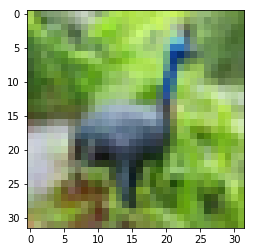

In [25]:
plt.imshow(X[6].reshape(32,32,3))
plt.show()

In [26]:
X.shape

(10000, 3072)

In [27]:
X = X / 255.
X = X - X.mean(axis=0)

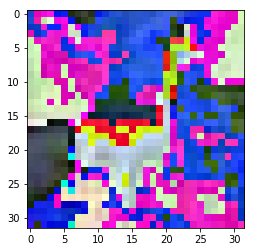

In [28]:
plt.imshow(X[6].reshape(32,32,3))
plt.show()

In [84]:
# compute the covariance of the image data
cov = X.dot(X.T)#np.cov(X, rowvar=True)   # cov is (N, N)
# singular value decomposition
U,S,V = np.linalg.svd(cov)     # U is (N, N), S is (N,)

In [83]:
# build the ZCA matrix
epsilon = 0.1
zca_matrix = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T))
# transform the image data       zca_matrix is (N,N)
zca = np.dot(zca_matrix, X)    # zca is (N, 3072)

ValueError: shapes (3072,3072) and (10000,3072) not aligned: 3072 (dim 1) != 10000 (dim 0)

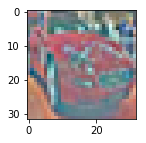

In [79]:
show(zca[5])

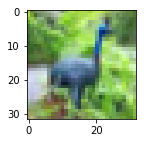

In [16]:
show(X[6])

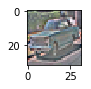

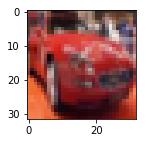

In [80]:
test = zca[32].reshape(32,32, 3)


plt.figure(figsize=(1,1))
plt.imshow((test - test.min()) / (test.max() - test.min()))
plt.show()
show(X[5])

In [35]:
def show(i):
    i = i.reshape((32,32,3))
    m = i.min()
    M = i.max()
    plt.figure(figsize=(2,2))
    plt.imshow((i - m) / (M - m))
    plt.show()
    plt.close()

20


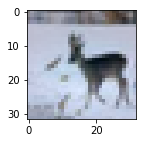

21


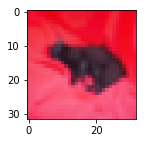

22


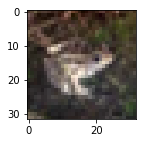

23


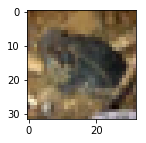

24


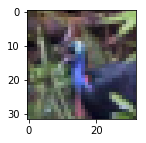

25


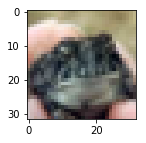

26


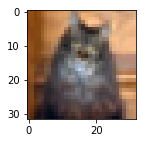

27


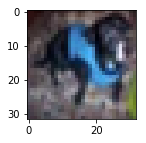

28


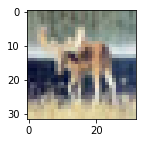

29


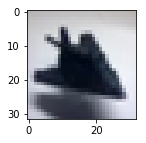

30


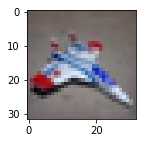

31


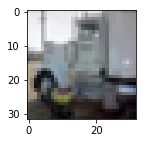

32


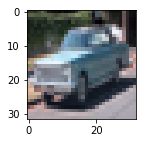

33


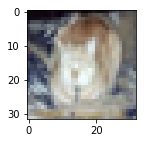

34


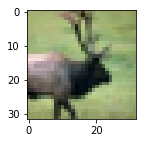

35


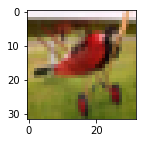

36


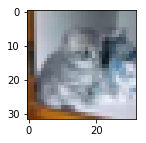

37


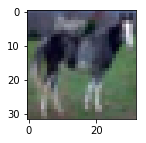

38


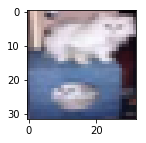

39


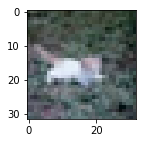

In [76]:
for i in range(20, 40):
    print i
    show(X[i])

In [45]:
images

{'batch_label': 'training batch 1 of 5',
 'data': array([[ 59,  43,  50, ..., 140,  84,  72],
        [154, 126, 105, ..., 139, 142, 144],
        [255, 253, 253, ...,  83,  83,  84],
        ..., 
        [ 71,  60,  74, ...,  68,  69,  68],
        [250, 254, 211, ..., 215, 255, 254],
        [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8),
 'filenames': ['leptodactylus_pentadactylus_s_000004.png',
  'camion_s_000148.png',
  'tipper_truck_s_001250.png',
  'american_elk_s_001521.png',
  'station_wagon_s_000293.png',
  'coupe_s_001735.png',
  'cassowary_s_001300.png',
  'cow_pony_s_001168.png',
  'sea_boat_s_001584.png',
  'tabby_s_001355.png',
  'muntjac_s_001000.png',
  'arabian_s_001354.png',
  'quarter_horse_s_000672.png',
  'passerine_s_000343.png',
  'camion_s_001895.png',
  'trailer_truck_s_000335.png',
  'dumper_s_000821.png',
  'alley_cat_s_000200.png',
  'accentor_s_000677.png',
  'frog_s_001671.png',
  'capreolus_capreolus_s_000051.png',
  'tomcat_s_000772.png',
  'picker

In [63]:
img = images['data'][np.array(images['labels'])==1]

[170 168 177 ...,  82  78  80]


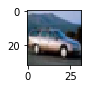

[159 150 153 ...,  14  17  19]


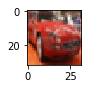

[ 50  51  42 ..., 166 166 162]


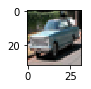

[139 144 146 ...,  80  75  59]


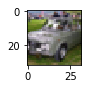

[ 54  59  56 ..., 111 106 101]


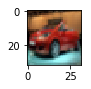

[94 72 60 ..., 46 46 42]


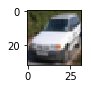

[201 191 194 ...,  88  85  91]


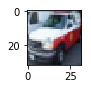

[114 117 120 ..., 182 192 187]


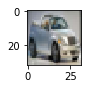

[65 67 69 ..., 62 73 83]


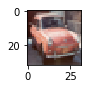

[148 132 134 ..., 162 162 186]


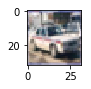

[ 65  76 188 ..., 107 108 110]


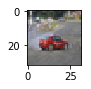

[248 248 250 ...,  64  63  25]


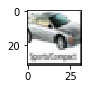

[227 158 172 ...,  87  90  92]


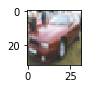

[106 107 108 ...,  54  53  52]


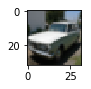

[33 29 32 ..., 63 47 40]


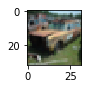

[ 62  50  46 ...,  47 111 160]


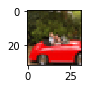

[254 254 254 ..., 254 254 254]


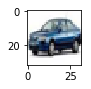

[121 124 120 ..., 112 111  92]


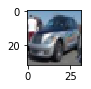

[239 234 231 ..., 134 135 135]


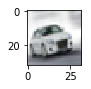

[167 168 170 ..., 115 121 116]


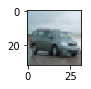

[7 7 7 ..., 0 0 0]


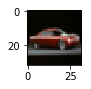

[35 36 42 ..., 32 33 32]


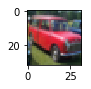

[198 194 195 ...,  36  39  45]


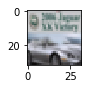

[185 184 183 ...,  99  99  96]


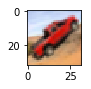

[255 255 255 ..., 254 254 255]


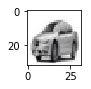

[163 171 164 ...,  74  78  82]


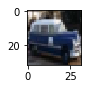

[189 188 186 ...,  98  95  91]


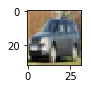

[214 212 214 ...,  58  60  61]


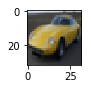

[ 48 128 156 ...,  20  19  30]


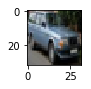

[47 57 70 ...,  2  2  3]


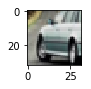

[108 100 130 ..., 136  89  67]


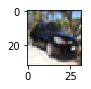

[255 255 255 ..., 255 254 255]


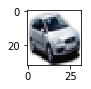

[157 157 166 ...,  59  83 106]


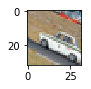

[124 123 123 ..., 119 124 123]


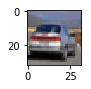

[175 174 177 ...,  81  76  71]


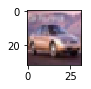

[129 136 141 ..., 121 121 121]


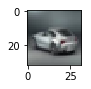

[147 147 166 ..., 126 121 115]


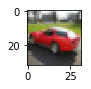

[177 232 247 ...,  42  45  58]


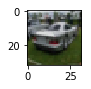

[ 45  51  48 ..., 189 191 196]


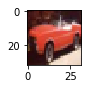

[62 65 69 ..., 61 61 60]


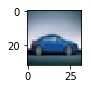

[30 48 46 ..., 83 84 82]


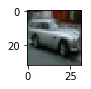

[56 60 62 ..., 79 92 96]


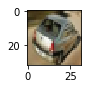

[177 176 186 ...,  66  68  67]


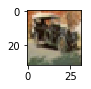

[64 85 92 ..., 33 35 34]


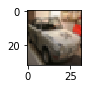

[161  82 102 ..., 106 123 188]


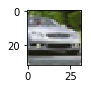

[56 62 66 ...,  8  7  8]


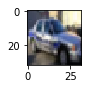

[124 124 133 ...,  51  49  53]


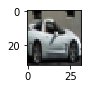

[241 238 240 ...,  56  55  56]


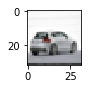

[ 36  36  42 ..., 173 157 156]


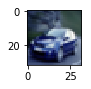

[100  38  55 ..., 142 130 123]


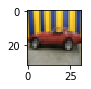

[133 164 168 ...,  83  98 115]


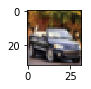

[255 253 254 ..., 255 254 255]


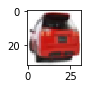

[174 175 176 ...,  91 211 233]


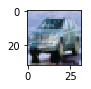

[67 67 81 ..., 97 95 92]


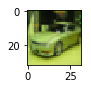

[194 192 194 ...,  15  15  15]


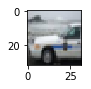

[ 10  10  11 ..., 176 180 163]


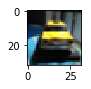

[ 39  43  37 ..., 235 233 229]


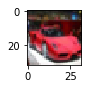

[82 82 70 ..., 55 57 66]


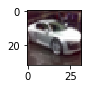

[ 83  59  42 ..., 125 120 112]


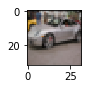

[255 252 253 ..., 253 253 253]


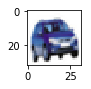

[ 86  74  66 ..., 190 197 203]


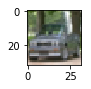

[ 85  98 166 ..., 117 115  88]


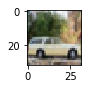

[250 246 246 ...,  87  88  89]


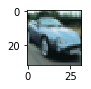

[185  99 147 ...,  62  72  61]


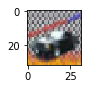

[206 165 170 ..., 142 140 141]


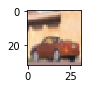

[ 68  72 124 ...,  70  65  66]


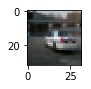

[255 251 251 ..., 152 155 153]


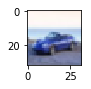

[164 128 137 ...,   5   5   5]


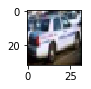

[215 214 212 ..., 144 143 141]


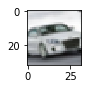

[ 16  15  15 ..., 165 166 163]


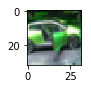

[ 58  53  47 ..., 175 178 180]


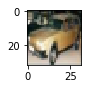

[220 210 168 ..., 100  91  81]


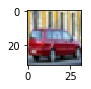

[136 128 125 ..., 153 152 157]


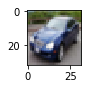

[212 174 151 ..., 107 101  95]


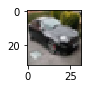

[255 255 255 ..., 100  91  95]


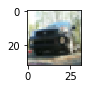

[231 232 224 ...,  83  82  82]


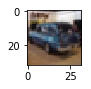

[80 86 67 ..., 50 46 46]


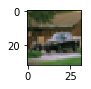

[143 150 168 ...,  94  91  88]


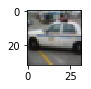

[141 138 137 ..., 129 146 159]


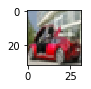

[225 219 217 ..., 104 101 100]


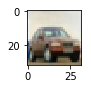

[234 235 236 ..., 142 149 151]


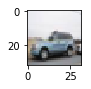

[ 89  88  90 ..., 118 113  92]


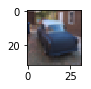

[ 52 119 155 ...,   6  10  11]


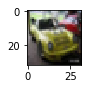

[ 82  91  57 ...,  56 164 119]


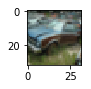

[170 173 173 ..., 185 184 183]


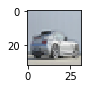

[35 28 32 ..., 35 27 14]


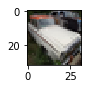

[253 249 238 ..., 154 176 249]


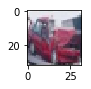

[119 127 119 ..., 183 175 169]


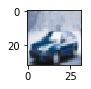

[ 86  52  23 ..., 143 134 127]


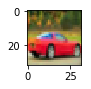

[19 16 28 ...,  8 13 10]


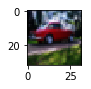

[ 22  26  32 ..., 181 175 174]


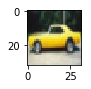

[13 13 15 ..., 66 53 96]


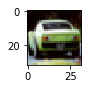

[ 51  54  30 ..., 206 208 213]


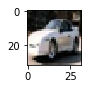

[151 245 202 ...,  55  37  47]


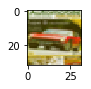

[169 173 176 ..., 147 171 181]


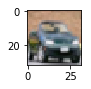

[255 255 255 ..., 147 164 166]


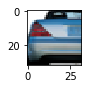

[150 138 130 ..., 185 122 136]


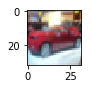

[ 59  63  66 ..., 211 208 208]


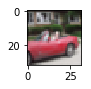

[ 29  21  30 ...,  85  95 100]


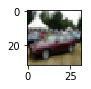

[255 255 255 ...,  76  48  37]


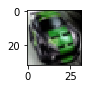

[139 141 147 ...,  80  79  75]


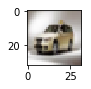

[183 190 194 ..., 186 175 165]


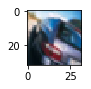

[213 217 220 ...,  88  85  81]


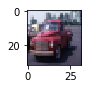

[221 217 217 ..., 161 160 163]


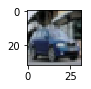

[65 65 17 ..., 90 89 88]


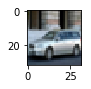

[ 70 104 222 ...,  89  85  88]


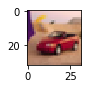

[255 255 255 ..., 255 255 255]


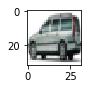

[255 253 253 ..., 254 254 255]


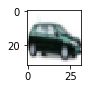

[134 128 125 ..., 133 116 115]


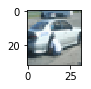

[148 147 106 ..., 159 162 170]


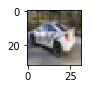

[254 254 254 ..., 255 255 255]


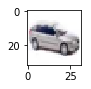

[145 131 115 ...,  89  88  91]


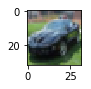

[ 91  96  94 ..., 105 118 109]


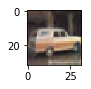

[231 185 104 ...,  54  54  60]


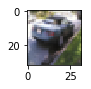

[214 195 187 ..., 182 179 176]


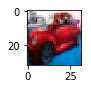

[ 95  92 107 ...,  91  95  89]


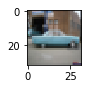

[14 26 26 ..., 23 26 17]


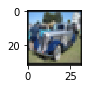

[ 42  48  55 ..., 152 152 149]


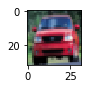

[255 254 255 ..., 255 255 255]


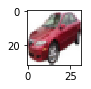

[55 71 72 ..., 68 66 47]


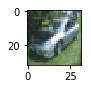

[ 13  13   9 ..., 227 225 227]


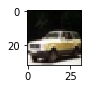

[122 140 179 ..., 163 166 164]


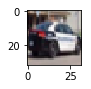

[ 57  72  81 ..., 124 117 118]


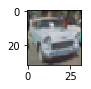

[221 218 218 ..., 236 237 238]


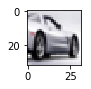

[255 255 255 ..., 255 255 255]


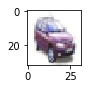

[ 67  81  73 ..., 126 117 107]


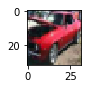

[219 224 228 ..., 173 173 175]


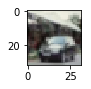

[ 18  20  21 ..., 154 155 154]


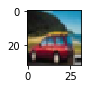

[198 189 177 ..., 134 146 142]


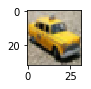

[ 50 102 173 ..., 172 184 200]


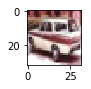

[218 195 197 ...,  96  94  94]


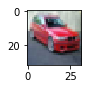

[253 250 250 ..., 252 252 252]


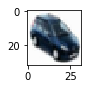

[153 146 149 ..., 172 175 176]


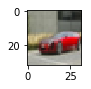

[150  73  48 ...,  93  93  91]


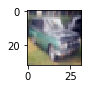

[165 165 122 ..., 135 136 137]


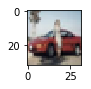

[166 170 180 ..., 254 251 250]


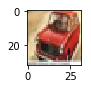

[69 62 56 ..., 56 56 55]


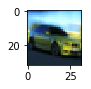

[160 141 112 ..., 250 241 206]


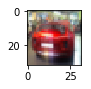

[73 94 87 ...,  6  8 12]


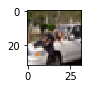

[ 96  95  77 ..., 181 179 182]


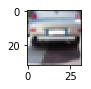

[144 135 109 ...,  78  83  83]


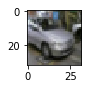

[136 138 145 ...,  51  45  40]


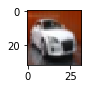

[ 62 210 212 ...,  49  46  48]


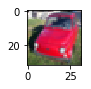

[146 153 164 ..., 127 130 132]


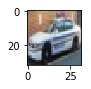

[202 199 198 ...,  64  58  57]


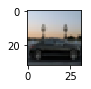

[114 118  91 ...,  54  55  52]


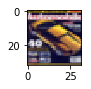

[ 52  55  73 ...,  84  91 124]


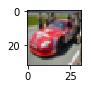

[114 114 114 ..., 208 208 207]


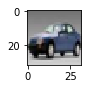

[158 122  85 ...,  41  39  40]


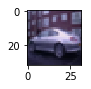

[ 81  78  70 ..., 132 126 117]


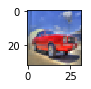

[ 92  80  82 ..., 158 160 160]


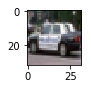

[ 18  25  37 ..., 143 137 127]


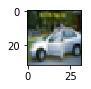

[ 65  98 108 ..., 169 174 179]


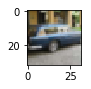

[175 175 183 ...,  34  41  35]


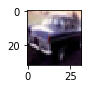

[ 78  70  71 ..., 217 217 220]


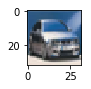

[ 88 100 107 ..., 146 144 136]


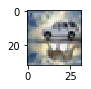

[159 147 142 ...,  68  73  79]


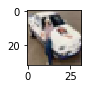

[253 224 200 ..., 247 250 251]


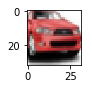

[ 48  49  41 ..., 137 133 128]


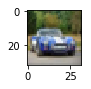

[164 142 161 ..., 130 133 127]


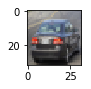

[178 235 248 ..., 167 176 172]


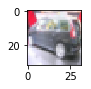

[131 139 157 ...,  81  87  98]


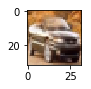

[ 93 103  92 ..., 189 188 194]


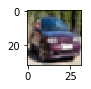

[ 62  57  61 ..., 164 168 156]


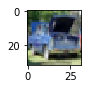

[150 149 150 ...,  94  94  94]


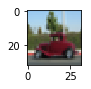

[255 254 254 ..., 255 255 255]


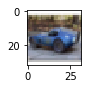

[212 212 216 ..., 166 177 176]


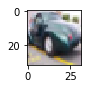

[ 41  50  42 ..., 171 175 184]


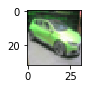

[222 216 217 ..., 255 254 254]


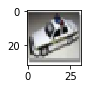

[188 184 195 ..., 126 125 125]


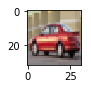

[ 24  55 117 ..., 127  99  70]


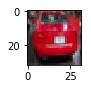

[200 198 198 ..., 250 250 249]


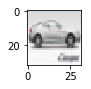

[173 127 101 ...,  90  94  94]


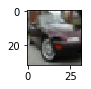

[255 255 255 ..., 162 162 163]


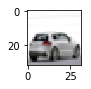

[187 186 187 ..., 151 151 154]


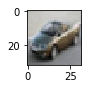

[ 45  64  63 ..., 116 109 107]


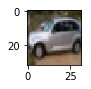

[149 147 147 ...,  85  86  82]


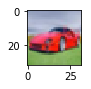

[171 103 103 ...,   9  13  17]


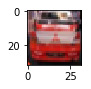

[233 230 239 ...,  51  51  50]


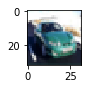

[176 104 131 ...,  44  47  90]


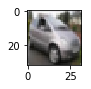

[253 252 252 ...,  24  25  26]


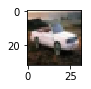

[129 140 174 ..., 169 169 173]


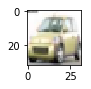

[  0   0   0 ..., 129 130 132]


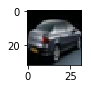

[123 117 123 ...,  34  40  48]


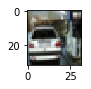

[255 255 255 ..., 125  86 133]


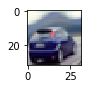

[254 253 252 ...,  43 143 248]


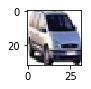

[214 217 218 ..., 133 134 136]


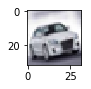

[ 71  82  96 ..., 110  57  31]


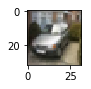

[249 245 246 ..., 113 115 113]


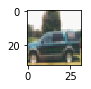

[121 120 120 ..., 153 153 154]


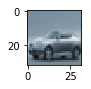

[ 28  25  30 ..., 127  84  83]


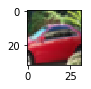

[70 65 67 ..., 43 27 11]


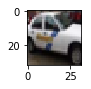

[246 246 251 ...,  28  27  24]


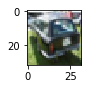

[255 255 255 ..., 254 253 254]


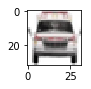

[253 252 252 ...,  80 120 153]


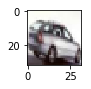

[131 151 188 ..., 146 142 134]


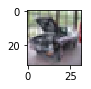

[94 94 95 ..., 83 84 86]


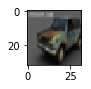

[27 29 23 ..., 58 59 48]


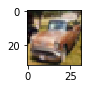

[ 2  1 33 ..., 89 83 81]


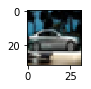

[235 232 234 ...,  47  49  44]


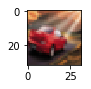

[39 40 50 ..., 55 43 32]


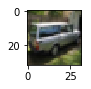

[190 217 152 ..., 196 203 192]


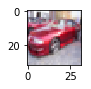

[ 13  46  48 ..., 190 192 198]


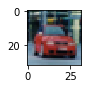

[ 14  37 150 ...,  95 149 146]


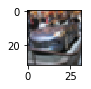

[194 208 220 ..., 252 252 252]


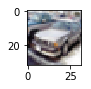

[0 0 0 ..., 0 0 0]


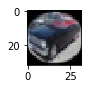

[240 236 234 ..., 238 239 238]


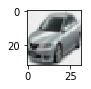

[197 189 165 ...,  26  10   7]


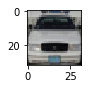

[187 100 112 ..., 144 150 147]


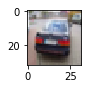

[221 223 226 ...,  44  42  50]


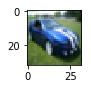

[13 18 24 ..., 22 23 20]


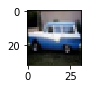

[250 230 202 ..., 255 255 255]


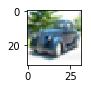

[213 240 234 ..., 199 192 178]


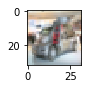

[60 56 42 ..., 27 24 26]


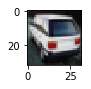

[196 193 193 ..., 120 117 118]


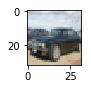

[253 254 254 ..., 255 255 255]


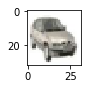

[ 94  78  78 ..., 152 152 155]


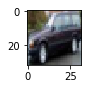

[ 88  81 155 ..., 133 123 118]


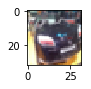

[148 210 236 ..., 206 205 210]


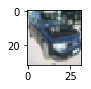

[223 230 224 ..., 135 137 139]


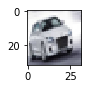

[138 140 143 ...,  83  83  87]


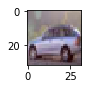

[ 58  54  54 ..., 105 102 104]


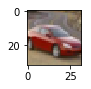

[ 99  99  99 ..., 184 185 183]


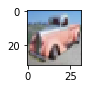

[255 255 255 ..., 196 197 202]


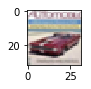

[216 227 213 ..., 166 165 167]


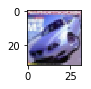

[252 249 250 ...,  55  53  94]


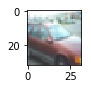

[255 255 255 ..., 255 255 255]


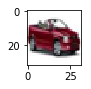

[255 251 252 ..., 252 251 255]


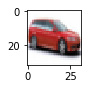

[116 119 122 ...,  21   6   1]


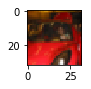

[240 239 239 ..., 159 158 149]


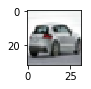

[248 242 242 ..., 129 128 125]


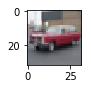

[127 101 122 ...,  42  49  53]


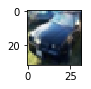

[76 77 79 ..., 18 21 30]


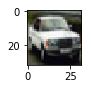

[129  85  89 ..., 186 186 185]


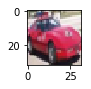

[ 18  19  21 ..., 121 117 115]


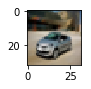

[69 96 68 ..., 28 18 38]


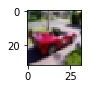

[72 68 70 ..., 11 46 69]


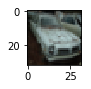

[245 236 214 ...,  91 100 119]


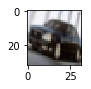

[255 252 252 ..., 255 255 255]


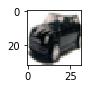

[255 252 226 ..., 255 255 255]


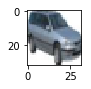

[148 147 151 ..., 130 130 130]


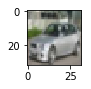

[237 245 244 ..., 102 101  98]


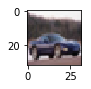

[166 159 157 ...,  85  96 104]


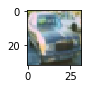

[249 251 250 ..., 141 162 155]


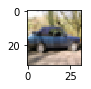

[185 189 189 ...,   3   7  79]


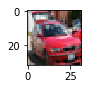

[158 180 201 ...,  43  38  51]


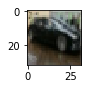

[212 184  99 ..., 140 138 134]


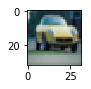

[ 55  58  55 ..., 239 239 238]


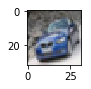

[ 80  81  83 ..., 112 112 111]


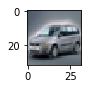

[ 36  42  63 ..., 143 153 159]


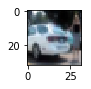

[116 118 132 ..., 105 126 159]


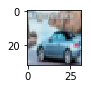

[123 112  91 ..., 151 150 152]


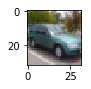

[248 230 194 ...,  96  99 101]


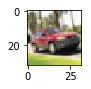

[ 47  40  29 ..., 117 117 117]


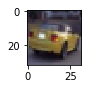

[145 110  98 ...,  53  49  43]


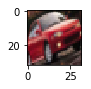

[196 161  99 ..., 228 229 231]


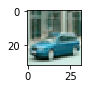

[ 52 102 109 ...,  60  53  44]


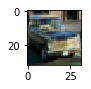

[ 98 101  98 ..., 175 172 169]


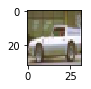

[195 197 205 ..., 152 151 146]


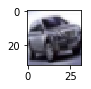

[  6   9  13 ..., 153 156 155]


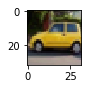

[116 110 142 ..., 145 137 137]


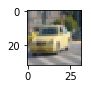

[149 121 104 ..., 102 108 116]


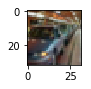

[49 52 62 ..., 41 44 43]


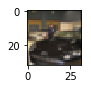

[144 143 144 ...,  43  45  42]


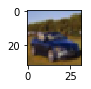

[12 50 39 ..., 71 76 80]


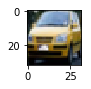

[173 139  78 ..., 102  97  98]


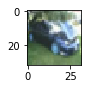

[126 115  91 ...,  71  71  77]


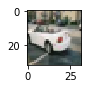

[132 137  99 ...,  92  89  86]


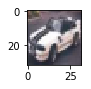

[ 33  32  23 ...,  44  96 104]


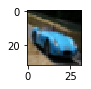

[253 250 242 ..., 250 252 254]


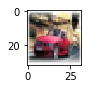

[225 208 191 ...,   9   8   8]


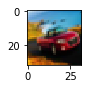

[245 243 245 ...,  22  22  23]


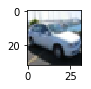

[104  92 124 ..., 182 183 185]


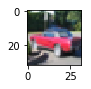

[152 156 160 ..., 205 205 205]


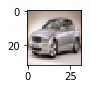

[94 55 33 ..., 22 22 23]


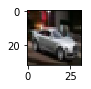

[ 86 126 152 ...,  99  96  92]


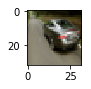

[ 42   9  12 ..., 160 162 161]


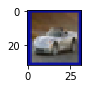

[57 58 61 ...,  2  1  1]


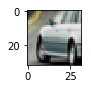

[ 94  92  92 ..., 115 113 116]


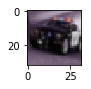

[250 249 250 ...,  75  76  76]


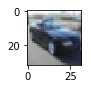

[76 53 46 ..., 42 39 36]


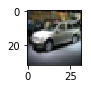

[165 150 143 ...,  77  98 122]


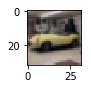

[ 33  36  84 ..., 176 174 176]


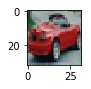

[94 93 91 ..., 19 23 26]


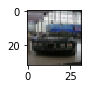

[254 253 253 ..., 254 254 254]


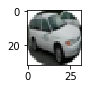

[255 255 255 ..., 255 255 255]


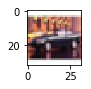

[148 146 146 ..., 168 166 165]


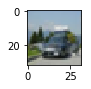

[132 132 133 ..., 105 105 102]


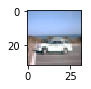

[255 255 255 ..., 253 253 255]


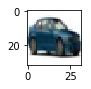

[171 174 177 ...,  81  82  78]


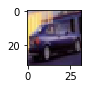

[146 142 142 ..., 161 168 165]


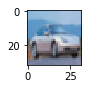

[255 253 253 ...,  56  68  90]


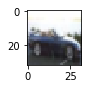

[107  90  82 ..., 170 166 161]


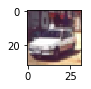

[216 207 221 ...,  77  86  90]


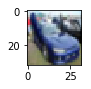

[255 251 251 ..., 254 254 254]


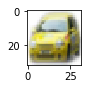

[246 242 242 ...,  83 111 132]


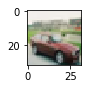

[ 98  97 103 ..., 115 163 230]


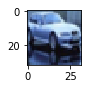

[ 64  68  86 ..., 241 238 235]


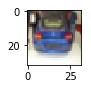

[79 75 75 ..., 31 26 27]


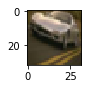

[ 16  13  10 ..., 239 236 233]


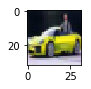

[249 245 244 ..., 159 151 143]


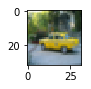

[165 168 170 ..., 156 156 162]


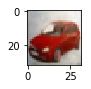

[105 107 113 ..., 162 165 184]


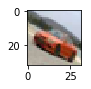

[240 233 238 ..., 132 132 129]


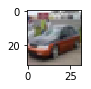

[255 252 253 ..., 234 232 232]


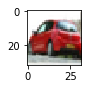

[129 128 130 ..., 185 184 187]


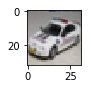

[ 34  41  49 ..., 175 174 174]


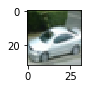

[ 81  98 112 ..., 132 139 170]


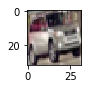

[ 91 104  98 ..., 125 126 127]


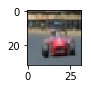

[246 241 242 ..., 158 160 165]


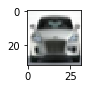

[210 205 210 ..., 103  96  87]


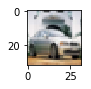

[39 39 41 ..., 46 48 48]


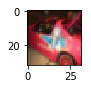

[58 59 39 ...,  7  3  3]


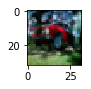

[131 123 109 ..., 150 145 141]


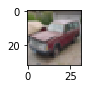

[ 86  79  76 ..., 127 126 128]


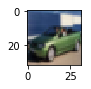

[116 120 122 ...,  75  70  67]


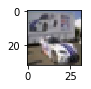

[255 255 255 ..., 255 255 255]


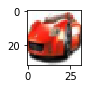

[255 255 255 ..., 255 255 255]


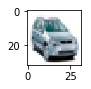

[ 80 126 114 ...,  46  45  41]


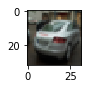

[120 122 166 ...,  61  67  72]


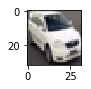

[201 210 227 ...,  76  84 102]


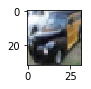

[120 118 121 ...,  67  64  63]


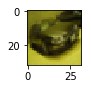

[133 126 139 ..., 112 120 130]


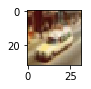

[218 210 211 ..., 163 164 164]


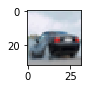

[0 0 0 ..., 0 0 0]


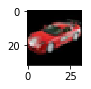

[ 91  79  63 ..., 133 136 141]


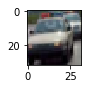

[223 223 226 ..., 148 156 152]


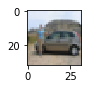

[158 137 134 ...,  95  89  89]


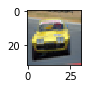

[255 252 253 ..., 246 249 252]


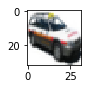

[77 86 62 ..., 97 96 95]


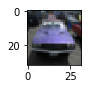

[161 162 164 ..., 142 139 138]


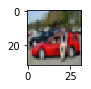

[252 253 253 ..., 219 245 250]


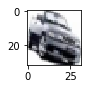

[138 140 140 ..., 204 205 206]


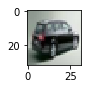

[ 15  13  14 ..., 105  87  84]


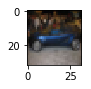

[ 38  35  35 ..., 158 155 152]


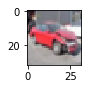

[0 1 1 ..., 6 3 3]


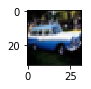

[114 134 129 ..., 134 134 137]


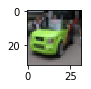

[ 1  1  1 ..., 51 55 55]


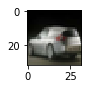

[156 158 154 ..., 114  94  87]


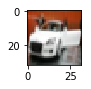

[220 230 239 ..., 250 252 250]


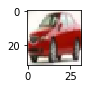

[199 190 207 ..., 129 127 119]


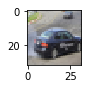

[100 102 101 ..., 141 142 144]


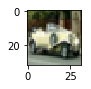

[255 255 255 ..., 249 249 249]


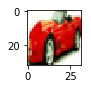

[255 255 255 ..., 255 255 255]


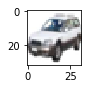

[253 253 254 ..., 253 253 253]


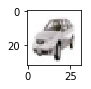

[68 76 46 ..., 93 35 86]


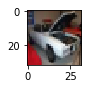

[255 253 253 ..., 255 255 255]


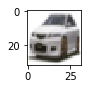

[222 225 228 ..., 101  95  94]


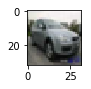

[ 90  90  98 ..., 101 102 101]


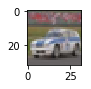

[115 116 108 ...,  82  94 104]


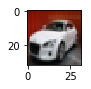

[100 124 137 ..., 105 105 106]


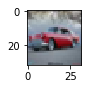

[ 79  69  66 ..., 183 184 195]


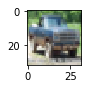

[ 79  95  91 ..., 207 207 207]


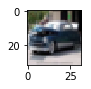

[113 103  83 ...,  96  98  95]


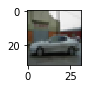

[184 181 190 ..., 148 158 171]


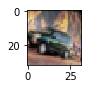

[247 248 248 ..., 177 178 178]


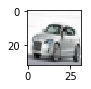

[10 12 14 ..., 83 60 73]


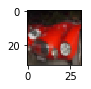

[251 251 251 ..., 183 184 179]


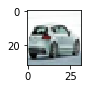

[43 51 53 ..., 57 40 30]


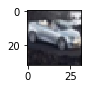

[190 158 160 ...,  42  39  34]


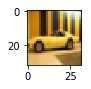

[89 85 82 ..., 89 65 69]


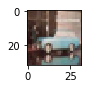

[123 111 102 ..., 158 154 155]


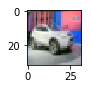

[252 249 250 ..., 166 167 155]


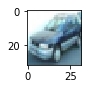

[195 192 193 ..., 207 210 209]


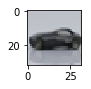

[ 16  10  19 ..., 253 253 253]


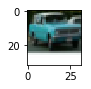

[125 125 130 ..., 133 145 141]


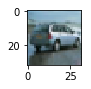

[ 45  51  50 ..., 185 127 106]


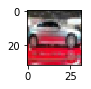

[ 76  62  47 ..., 148 143 159]


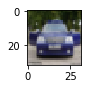

[ 37  61 142 ..., 203 202 207]


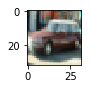

[32 35 70 ..., 41 38 30]


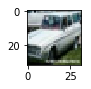

[148 145 151 ..., 160 171 170]


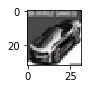

[188 191 221 ...,  18  17  13]


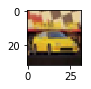

[145 103 109 ..., 255 255 255]


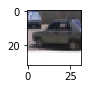

[255 254 255 ...,  20  20  21]


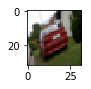

[22 15 24 ..., 46 50 47]


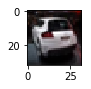

[237 243 245 ..., 159 158 156]


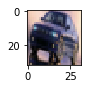

[ 82  27  31 ..., 124 124 122]


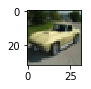

[ 2  2  3 ..., 40 37 32]


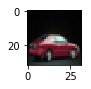

[0 0 0 ..., 0 0 0]


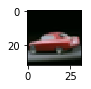

[ 98 105 107 ..., 115 107  95]


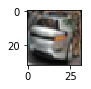

[76 83 94 ..., 46 48 49]


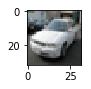

[143 142 142 ..., 137 156 166]


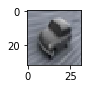

[ 75  75  83 ..., 136 136 138]


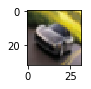

[ 14  20  35 ..., 155 156 155]


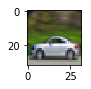

[139 141 152 ...,  20  38  35]


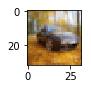

[ 29  44  57 ..., 205 203 200]


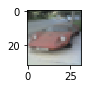

[ 78  98 108 ...,  20  14  28]


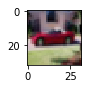

[ 12  19  22 ..., 154 167 166]


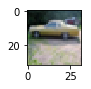

[254 251 252 ..., 252 253 255]


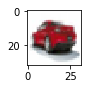

[ 86  83  75 ..., 178 165 158]


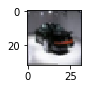

[ 48  53  70 ..., 123 122 128]


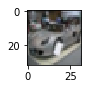

[ 80  81 108 ..., 186 178 168]


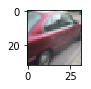

[71 65 72 ..., 24 21 21]


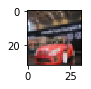

[115 119 150 ...,  51  55  57]


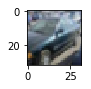

[170 190 197 ...,  14  11   6]


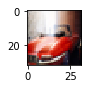

[ 37  43  74 ..., 148 140 139]


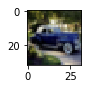

[189 183 162 ...,  31  39  38]


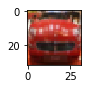

[215 212 213 ..., 150 147 143]


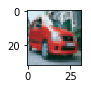

[176 174 175 ...,  57  64  63]


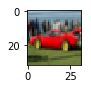

[147 145 146 ...,  98 110 108]


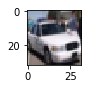

[ 31  28  32 ..., 162 166 170]


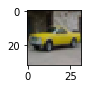

[186 183 182 ..., 111 108 108]


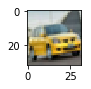

[197 131 128 ..., 221 218 215]


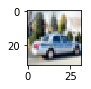

[ 5  9  8 ..., 78 78 80]


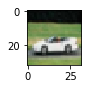

[165 150 144 ..., 127 126 119]


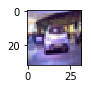

[255 255 255 ..., 255 255 255]


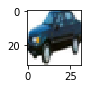

[216 214 217 ..., 183 186 152]


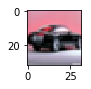

[ 91  89 108 ...,  73  74  74]


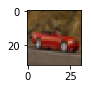

[ 6  6  8 ..., 32 28 24]


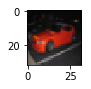

[156 158 156 ..., 130 128 129]


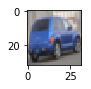

[154 152 150 ..., 115 119 121]


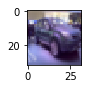

[255 255 255 ..., 254 254 255]


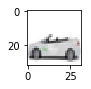

[106 113 119 ...,  98  99  99]


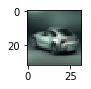

[255 251 251 ..., 211 206 217]


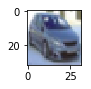

[130 129 119 ...,  42  37  35]


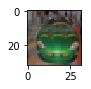

[203 202 200 ...,  83  83  80]


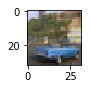

[135 137 140 ..., 128 124 116]


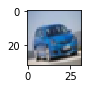

[160 166 175 ..., 207 206 204]


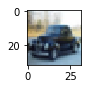

[255 255 255 ..., 251 251 255]


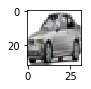

[ 77  56  45 ..., 107  98 102]


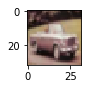

[ 65  58  74 ..., 161 151 147]


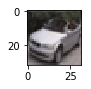

[40 53 53 ..., 96 92 91]


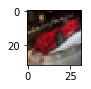

[ 13  15  19 ..., 163 171 233]


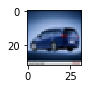

[162 174 175 ..., 122 115 122]


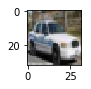

[ 56  49  34 ..., 138 134 128]


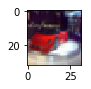

[180 175 184 ..., 104 117 121]


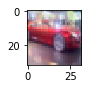

[195 192 191 ..., 147 143 148]


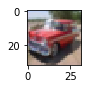

[174 172 172 ...,  81  83  84]


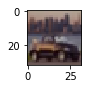

[131 165 156 ...,  76  73  71]


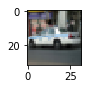

[ 53 144 151 ...,  73  63  55]


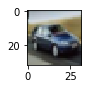

[ 24  44 132 ..., 211 207 203]


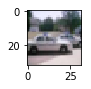

[255 255 255 ..., 255 255 255]


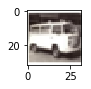

[160 111  71 ...,  48  48  51]


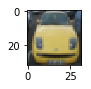

[202 232 233 ...,  35  40  39]


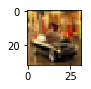

[37 46 62 ..., 25 24 24]


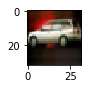

[ 22  29  24 ..., 138 133 126]


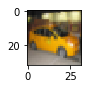

[ 97  64  54 ..., 168 168 164]


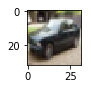

[252 253 254 ..., 255 255 255]


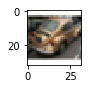

[219 216 216 ..., 201 193 235]


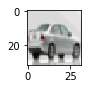

[ 31  23  11 ..., 111 129 125]


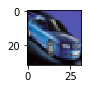

[253 250 250 ..., 105 106 109]


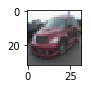

[218 217 219 ..., 142 143 141]


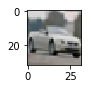

[  2   1   2 ..., 135 134 136]


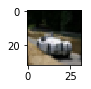

[ 61 129 133 ..., 121 129 130]


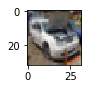

[ 57  50  81 ..., 178 181 233]


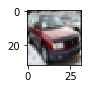

[255 253 254 ..., 114 113 115]


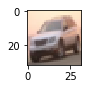

[144 144 146 ...,  71  70  71]


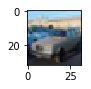

[ 41  39  87 ..., 103 110 114]


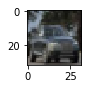

[173 175 179 ..., 155 166 176]


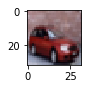

[100 100 104 ..., 118  95 105]


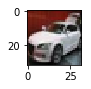

[ 0  0  1 ..., 32 32 33]


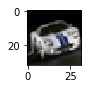

[233 230 232 ..., 161 161 162]


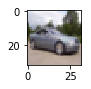

[ 29  45  59 ..., 181 181 182]


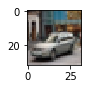

[255 247 246 ..., 156 155 159]


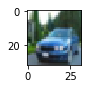

[146 145 147 ..., 138 138 138]


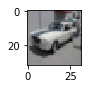

[255 255 255 ..., 145 145 145]


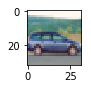

[223 227 230 ..., 108  95  78]


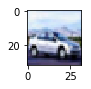

[146 145 149 ...,  48  43  43]


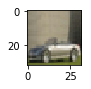

[ 88  75 103 ...,  96  96  93]


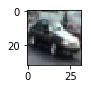

[27 26 39 ..., 68 79 90]


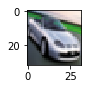

[205 202 202 ..., 248 248 248]


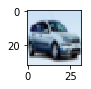

[ 51 121  65 ..., 150 160 191]


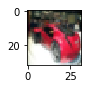

[153 148 160 ...,  79  77  85]


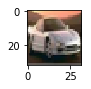

[255 252 243 ...,  94  87  89]


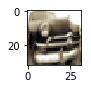

[15 16 18 ..., 41 38 34]


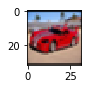

[37 36 42 ..., 62 67 67]


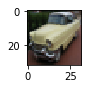

[182 177 178 ...,  22  26  26]


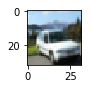

[  8   5  12 ..., 124 127 124]


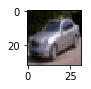

[114  93  84 ..., 163 166 162]


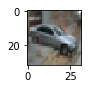

[ 63  59  65 ..., 107 105 104]


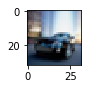

[88 67 77 ..., 89 75 67]


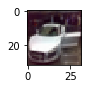

[112 115 104 ...,  89  86  85]


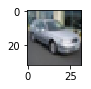

[237 236 239 ..., 111  89  76]


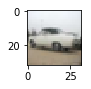

[ 26  28  33 ..., 150 150 149]


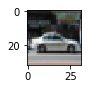

[22  4  1 ..., 45 45 44]


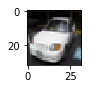

[164 140 146 ..., 187 188 207]


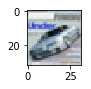

[184 199 202 ...,  94 105 115]


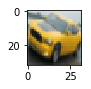

[255 255 255 ..., 255 255 255]


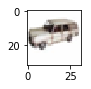

[197 216 231 ..., 135 131 130]


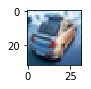

[121 120 121 ...,  63  62  61]


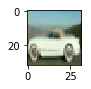

[ 59  72  40 ..., 196 195 193]


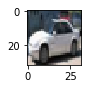

[255 255 255 ..., 255 255 255]


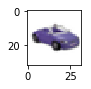

[32 13  9 ..., 45 43 39]


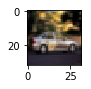

[ 32  51  80 ..., 123 121 126]


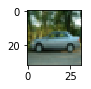

[ 52  53  53 ..., 202 201 202]


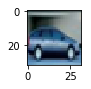

[231 234 237 ...,  83  98  84]


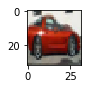

[77 76 81 ..., 52 51 50]


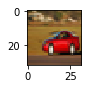

[228 224 223 ..., 172 176 184]


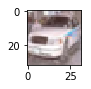

[249 245 246 ..., 222 222 224]


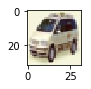

[72 76 82 ..., 94 88 74]


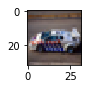

[189 189 189 ...,  89  88  88]


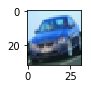

[170 152 141 ..., 113 123 118]


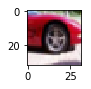

[211 210 210 ...,  76  75  74]


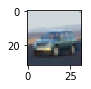

[255 253 253 ..., 253 254 255]


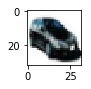

[222 221 222 ...,  16  13  15]


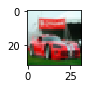

[12 17 23 ..., 87 84 79]


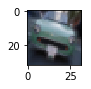

[ 18  20  21 ..., 107 106 106]


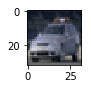

[133 163 148 ..., 240 238 234]


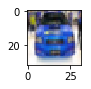

[141 141 142 ...,  94  94  93]


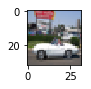

[196 218 210 ...,  88  93  98]


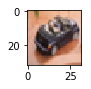

[79 77 96 ..., 38 43 83]


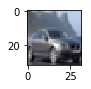

[ 65  65 103 ..., 111 109 114]


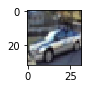

[ 22  15  11 ..., 123 119 131]


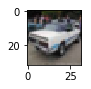

[119 117 117 ..., 133 137 141]


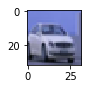

[174 137  97 ..., 217 214 209]


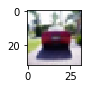

[29 41 50 ..., 55 57 55]


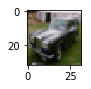

[ 25  30  36 ..., 187 185 180]


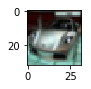

[27 29 66 ..., 36 31 25]


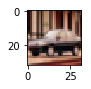

[118 116 119 ..., 118 119 118]


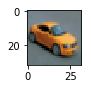

[180 147 148 ..., 163 162 156]


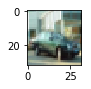

[255 252 252 ..., 252 252 252]


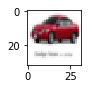

[234 239 247 ..., 102 117 127]


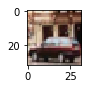

[51 39 48 ..., 55 54 57]


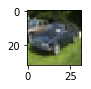

[40 44 47 ..., 96 97 98]


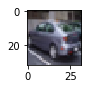

[170 155  98 ..., 147 142 138]


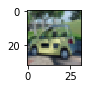

[116 114  99 ...,  15  36 108]


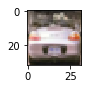

[255 255 255 ..., 172 168 169]


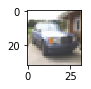

[214 214 215 ...,  74  69  64]


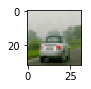

[102  43  35 ..., 105 105 104]


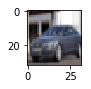

[175 234 237 ..., 230 232 237]


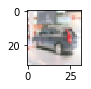

[239 228 221 ..., 132 130 129]


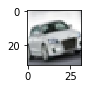

[ 94 105 108 ..., 155 154 150]


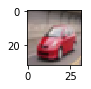

[201 197 199 ..., 238 237 235]


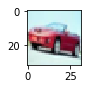

[ 54  67  90 ..., 128 125 116]


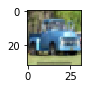

[108 101 108 ..., 188 189 188]


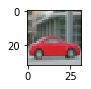

[ 57  70  61 ..., 131 126 125]


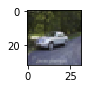

[ 56  51  49 ..., 150 111 107]


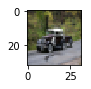

[118 104 103 ..., 208 208 205]


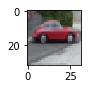

[ 37  36  45 ..., 165 164 163]


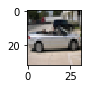

[ 45  46  44 ..., 221 221 222]


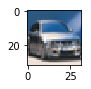

[ 84  82  94 ..., 111 161 194]


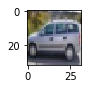

[163 123  82 ..., 126 125 108]


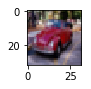

[143 123  84 ..., 162 162 158]


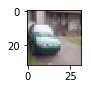

[79 31 33 ..., 80 92 75]


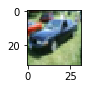

[ 94  99 102 ..., 119 117 113]


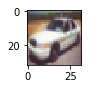

[245 238 239 ...,  41  42  45]


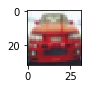

[41 32 35 ..., 83 64 61]


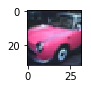

[237 236 238 ..., 137 138 137]


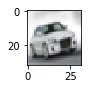

[36 32 42 ..., 13 12 14]


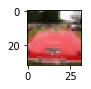

[ 32  68  56 ...,  61  81 100]


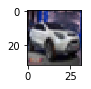

[255 255 255 ..., 255 255 255]


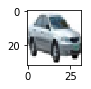

[81 77 71 ..., 94 94 93]


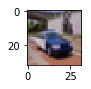

[ 92  95  97 ..., 147 149 160]


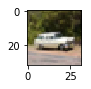

[206 206 210 ..., 175 166 164]


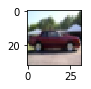

[255 254 255 ..., 255 255 255]


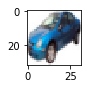

[136 151 150 ..., 122 147 159]


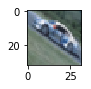

[217 211 152 ..., 120 119 119]


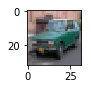

[73 49 21 ..., 21 16 11]


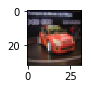

[255 255 255 ..., 255 255 255]


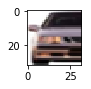

[207 211 215 ..., 123 120 117]


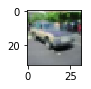

[52 33 23 ..., 96 94 87]


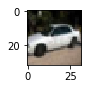

[131 119 124 ..., 144 146 145]


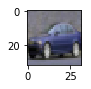

[251 249 249 ..., 126 127 128]


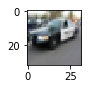

[117  88  79 ...,  64  66  49]


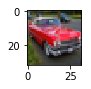

[228 225 225 ...,  97 101 105]


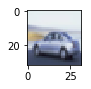

[255 253 254 ..., 139 137 132]


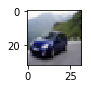

[ 22  23  21 ..., 157 164 163]


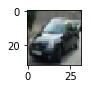

[243 241 242 ...,  46  42  40]


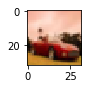

[185 195 198 ..., 124 124 124]


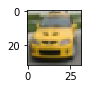

[134 133 140 ..., 212 212 212]


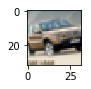

[81 80 96 ..., 39 34 29]


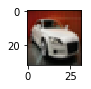

[ 47  59  64 ..., 130 128 125]


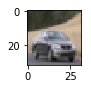

[171 166 166 ...,  88  89  92]


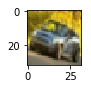

[128 206 163 ..., 106  98  96]


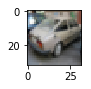

[239 245 250 ..., 210 215 224]


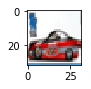

[148 149 151 ..., 131 136 139]


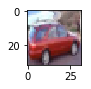

[ 18  13  19 ..., 194 196 197]


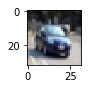

[255 253 253 ..., 254 254 255]


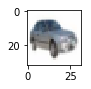

[ 69  74  79 ..., 177 179 178]


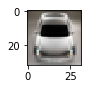

[255 252 253 ..., 251 251 251]


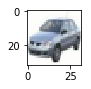

[255 255 255 ..., 156 202 254]


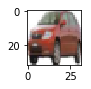

[208 219 232 ...,  95  95  96]


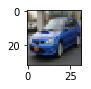

[79 71 78 ..., 58 43 39]


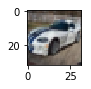

[ 37  33  35 ...,  93 100  87]


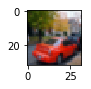

[236 223 226 ..., 244 243 245]


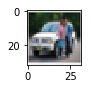

[ 74  76  77 ..., 149 146 137]


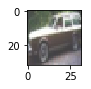

[143 134 125 ..., 164 161 146]


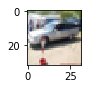

[ 75 111 142 ...,  80  67  77]


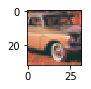

[ 96  93 108 ..., 156 157 159]


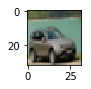

[164 192 180 ...,  73  84  81]


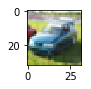

[122  90  85 ..., 192 234 229]


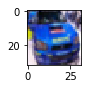

[120 133 135 ..., 144 163 179]


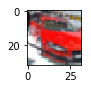

[51 70 72 ..., 54 76 99]


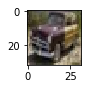

[72 51 50 ..., 27 19 12]


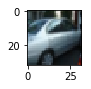

[206 205 208 ..., 112 112 116]


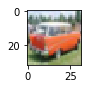

[175 143 120 ..., 213 213 216]


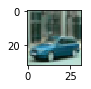

[106 104 112 ..., 135 132 140]


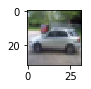

[1 5 3 ..., 3 1 0]


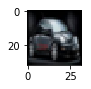

[ 59  85  65 ..., 110  93  19]


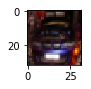

[112 113 112 ...,  60  63  61]


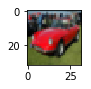

[253 250 250 ..., 251 250 253]


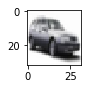

[120 121 119 ..., 201 199 200]


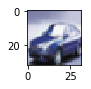

[123 110 118 ...,  31  33  37]


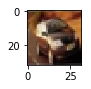

[16  4  4 ..., 86 85 89]


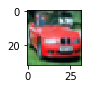

[ 57  54  61 ..., 216 203 195]


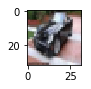

[104 100  98 ...,  14  18  18]


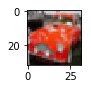

[139 136 135 ...,  63  61  58]


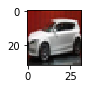

[151 146 144 ...,  87  87  88]


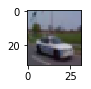

[236 223 214 ...,  22  23  74]


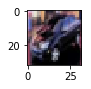

[255 254 254 ..., 254 254 255]


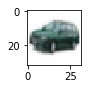

[164 166 166 ..., 151 152 151]


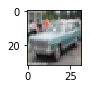

[255 253 253 ..., 240 241 247]


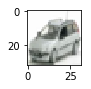

[255 254 255 ..., 236 235 234]


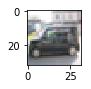

[231 226 245 ..., 150 150 150]


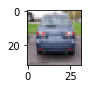

[183 182 188 ..., 129 126  89]


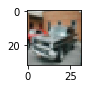

[131 115 117 ..., 190 204 232]


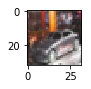

[204 233 240 ..., 210 204 200]


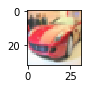

[107 107 106 ..., 134 119 120]


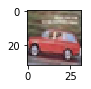

[62 62 65 ..., 60 55 55]


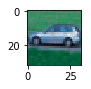

[115 105 106 ..., 159 157 150]


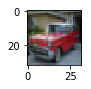

[19 21 86 ..., 28 35 37]


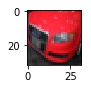

[255 254 254 ..., 104 101 105]


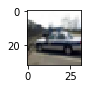

[180 174 173 ...,  18  19  18]


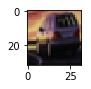

[213 212 213 ..., 100 108  93]


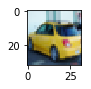

[252 242 240 ...,  64  62  62]


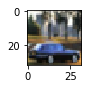

[179 193 208 ...,  89 102 106]


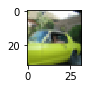

[105 136 155 ..., 168 166 152]


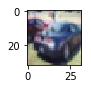

[235 226 234 ..., 164 160 168]


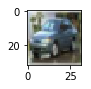

[151 147 125 ..., 166 165 163]


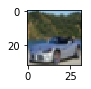

[212 213 214 ..., 127 133 138]


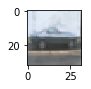

[ 77  67  68 ..., 132 129 133]


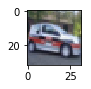

[253 200 166 ...,  26  30  38]


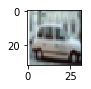

[2 2 2 ..., 9 9 9]


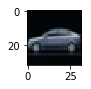

[22 23 23 ..., 40 35 39]


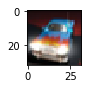

[ 93  87  86 ..., 183 184 184]


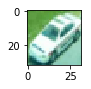

[ 52  51  51 ..., 221 207 210]


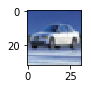

[252 250 251 ...,  38  34  31]


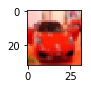

[248 237 240 ...,  53 124  93]


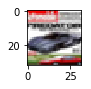

[175 128 112 ..., 111 107 112]


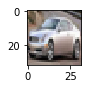

[255 251 252 ..., 255 255 255]


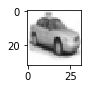

[226 207 207 ..., 196 194 193]


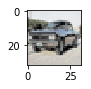

[111 107 125 ..., 161 162 151]


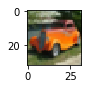

[120 115  53 ...,  75  66  67]


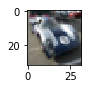

[84 86 74 ..., 91 95 99]


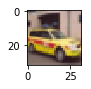

[ 46  40  43 ..., 133 130 125]


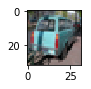

[84 55 59 ..., 35 34 36]


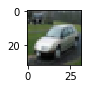

[153 224  97 ..., 103 107 117]


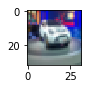

[255 255 255 ..., 143 145 144]


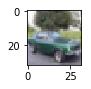

[113 111 115 ...,  85  77  72]


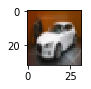

[ 74  75  47 ..., 230 229 229]


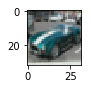

[255 255 255 ..., 255 255 255]


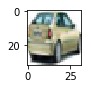

[ 10  11  14 ..., 124 121 118]


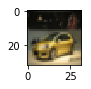

[175 143 100 ...,  81 100 125]


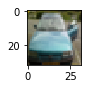

[255 252 251 ..., 149 201 187]


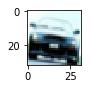

[ 18  16  17 ...,  45  97 125]


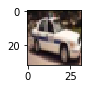

[109 106 106 ...,  64  74  66]


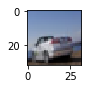

[145 153 155 ..., 161 161 157]


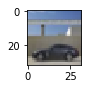

[19 20 22 ..., 40 41 61]


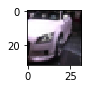

[100 152 164 ..., 180 178 180]


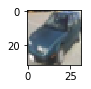

[255 253 254 ..., 254 253 255]


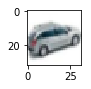

[ 15  15  14 ..., 178 176 177]


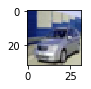

[ 62  45  31 ..., 128 137 137]


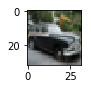

[ 81  77  67 ..., 101 103 103]


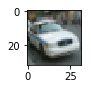

[139 144 141 ..., 124 118 113]


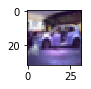

[152 145 132 ..., 142 141 141]


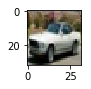

[ 79  56  49 ..., 145 143 146]


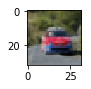

[253 250 251 ...,  51  52  51]


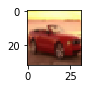

[ 87 106 113 ...,  76  76  76]


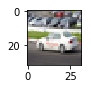

[ 29  36  52 ..., 180 167 173]


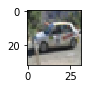

[ 45 104 179 ...,  80  97  88]


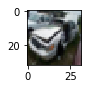

[  6   9  27 ..., 106 107 103]


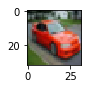

[158 156 187 ...,   7  10  14]


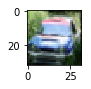

[51 17 14 ..., 75 71 54]


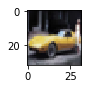

[150 164 170 ...,  54  58  54]


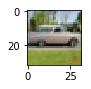

[162 167 138 ...,  55  58  55]


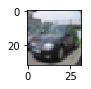

[111 126  22 ..., 232 226 229]


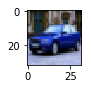

[206 208 209 ...,  89  88  86]


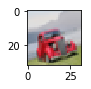

[196 210 229 ..., 173 172 170]


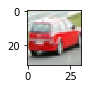

[ 89  86  88 ..., 201 204 208]


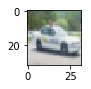

[161 170 180 ..., 108 104 101]


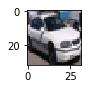

[255 255 255 ..., 255 255 255]


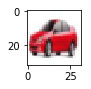

[73 82 87 ..., 18 17 20]


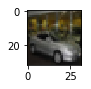

[14 17 17 ..., 34 31 27]


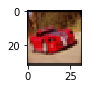

[168 165 189 ..., 161 164 161]


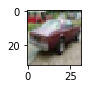

[105 125 147 ..., 117 119 115]


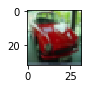

[175 182 185 ...,  86  84  84]


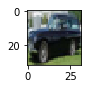

[131 127 124 ..., 107 107 113]


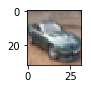

[ 48  43  38 ...,  54 107  36]


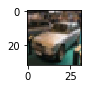

[106 109 145 ...,  76  75  70]


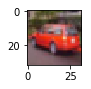

[198 199 202 ..., 122  93 104]


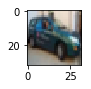

[159  87 154 ...,  82  80  79]


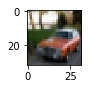

[136 136 101 ...,  96  94  93]


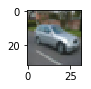

[0 0 0 ..., 7 8 9]


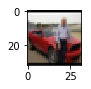

[250 244 248 ...,  99 103 112]


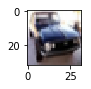

[174 165 148 ..., 255 255 255]


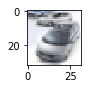

[86 85 92 ..., 55 63 78]


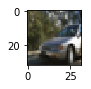

[ 58  91 145 ...,   4   5   4]


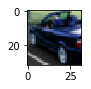

[255 255 255 ..., 255 255 255]


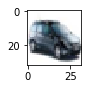

[193 229 231 ...,  26  64  82]


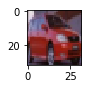

[161 166 190 ...,  80  83  86]


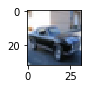

[143 147 158 ...,   9   8  37]


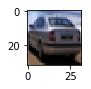

[124 135 135 ..., 130 132 152]


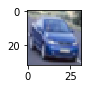

[220 211 212 ..., 177 184 153]


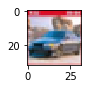

[88 83 86 ..., 56 43 38]


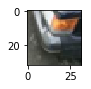

[190 189 191 ...,  35  44  61]


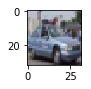

[251 245 246 ..., 252 251 254]


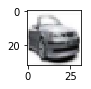

[255 251 251 ...,  17  38 166]


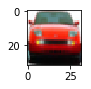

[106 101  80 ...,  79  77  69]


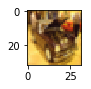

[217 216 215 ...,  97 100 103]


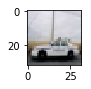

[121 130 152 ...,  55  63  69]


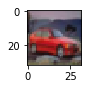

[48 42 50 ..., 30 29 29]


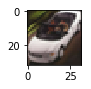

[151  78  56 ..., 226 223 220]


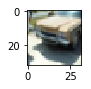

[ 90 102 104 ..., 216 209 202]


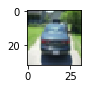

[103 186 220 ...,  37  57  69]


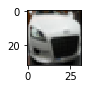

[48 40 42 ..., 63 68 77]


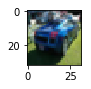

[75 75 76 ...,  2  2  3]


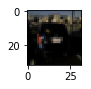

[255 255 255 ..., 255 255 255]


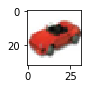

[232 233 232 ...,  95 107 166]


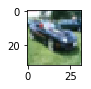

[215 215 214 ...,  81  78  78]


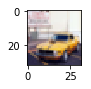

[255 255 255 ..., 120 114 118]


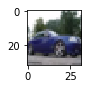

[88 95 82 ..., 19 37 42]


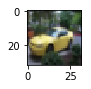

[21 21 19 ..., 28 26 83]


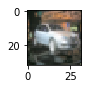

[157 112  91 ..., 121 143 155]


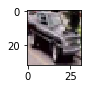

[ 75  74  71 ..., 166 165 164]


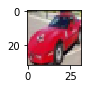

[242 239 239 ...,  22  21  20]


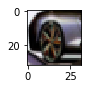

[255 255 255 ..., 254 254 254]


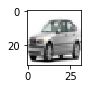

[244 242 242 ...,  74  73  70]


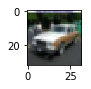

[197 218 213 ...,  69  76  73]


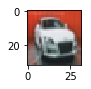

[106 106 108 ..., 180 183 183]


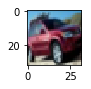

[ 95  94  88 ..., 150 145 144]


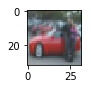

[26 19 19 ..., 76 82 80]


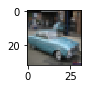

[26 42 42 ..., 15 12 17]


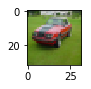

[224 224 223 ...,  23  17  17]


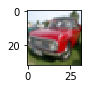

[218 217 218 ...,  74  55  55]


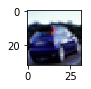

[ 24  22  24 ...,  91 105  99]


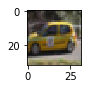

[255 255 255 ...,  43  45  45]


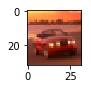

[51 50 49 ..., 88 89 89]


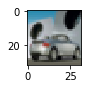

[255 255 255 ..., 255 255 255]


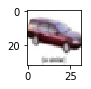

[255 253 253 ..., 250 253 253]


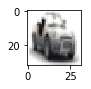

[ 9  7 22 ..., 49 49 49]


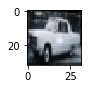

[ 48  64  52 ..., 127 152 105]


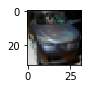

[201 203 205 ...,  58  64  64]


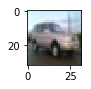

[128 128 127 ...,  83  95 114]


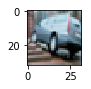

[21 29 27 ...,  9  9  8]


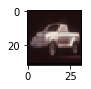

[134 133 134 ..., 168 148 132]


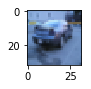

[ 26  22  24 ..., 130 131 131]


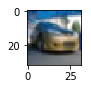

[ 99 101  95 ..., 160 176 177]


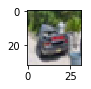

[154 159 164 ..., 197 192 183]


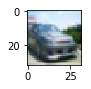

[198 193 142 ..., 142 140 141]


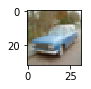

[194 217 238 ..., 106 101 105]


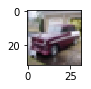

[200 198 191 ..., 141 142 141]


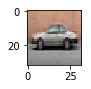

[255 253 254 ..., 255 255 255]


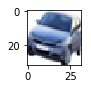

[239 237 235 ..., 138 136 136]


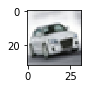

[112 101 108 ..., 167 166 167]


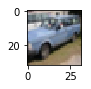

[121 124 110 ..., 132 126 122]


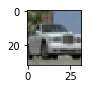

[198 221 251 ...,  74  75  80]


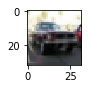

[48 41 40 ..., 84 87 84]


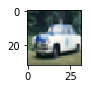

[ 69  71  77 ...,  98 103  95]


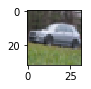

[ 76  85  84 ..., 147 166 172]


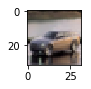

[255 255 255 ..., 255 255 255]


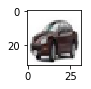

[13  9 12 ..., 89 92 93]


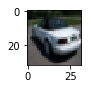

[255 255 255 ..., 251 250 253]


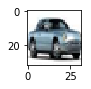

[222 218 220 ...,  95  94  93]


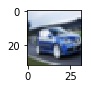

[11 15 28 ...,  0  0  0]


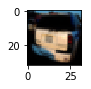

[80 85 96 ..., 21 18 18]


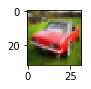

[  1   1   1 ..., 175 178 179]


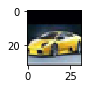

[254 255 255 ..., 100  95  63]


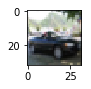

[41 35 26 ..., 66 70 73]


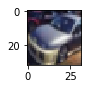

[ 54  45  44 ...,  83  93 100]


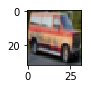

[ 76 102 127 ...,  68  65  70]


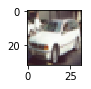

[168 161 160 ...,  53  49  58]


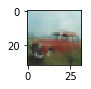

[200 209 217 ...,  49  98  55]


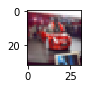

[ 44  48  53 ..., 188 193 200]


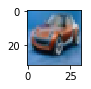

[119 181 188 ...,  26  26  31]


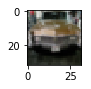

[102 103 100 ...,  80  75  74]


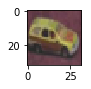

[168 169 172 ...,  97 101 102]


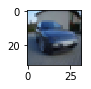

[ 52  88  93 ..., 111 107 104]


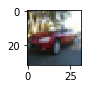

[255 255 255 ..., 255 255 255]


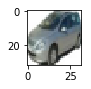

[ 84 108 125 ..., 124 124 122]


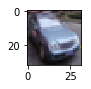

[133 141 172 ..., 104 104 104]


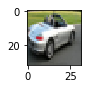

[ 71  71  71 ...,  90  88 108]


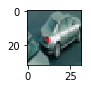

[ 67  54  45 ..., 113 122 122]


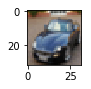

[223 225 229 ...,  37  46  56]


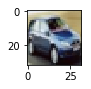

[37 36 22 ..., 61 59 58]


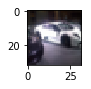

[114 102 114 ..., 210 210 214]


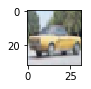

[182 156 140 ...,  12  12  13]


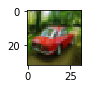

[140 182 236 ..., 211 214 213]


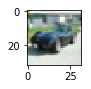

[251 230 116 ..., 106 110 110]


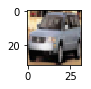

[194 194 195 ...,  95  96  97]


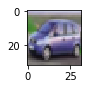

[208 216 237 ..., 218 218 220]


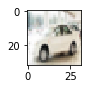

[241 246 238 ..., 173 165 155]


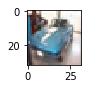

[32 50 38 ..., 24 32 29]


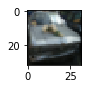

[247 243 245 ..., 141 141 139]


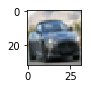

[155 156 158 ...,  18  18  19]


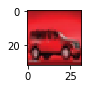

[126 161 153 ..., 111 103 100]


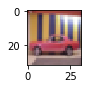

[ 42  57 129 ..., 106 126 138]


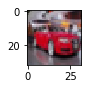

[255 252 253 ..., 159 159 161]


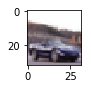

[ 66 122  97 ...,  45  53  74]


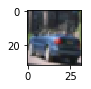

[ 98 118 122 ...,  45  22  17]


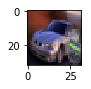

[ 86  85  87 ..., 190 189 200]


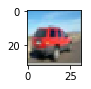

[165 168 168 ...,  93  96 102]


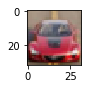

[145 136 128 ..., 105 107 106]


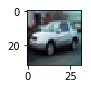

[205 192 201 ...,  42  41  22]


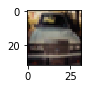

[ 76  74  72 ..., 183 174 168]


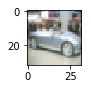

[106 112 106 ..., 145 149 160]


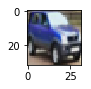

[ 17  16  16 ..., 108 115 125]


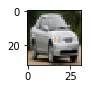

[255 255 255 ..., 255 255 255]


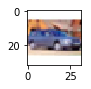

[248 248 248 ..., 183 187 186]


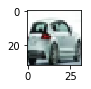

[224 245 245 ..., 195 193 194]


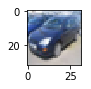

[236 235 238 ..., 160 161 161]


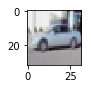

[255 255 255 ..., 236 255 254]


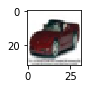

[225 222 220 ...,  86  91  94]


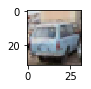

[179 179 183 ..., 206 202 198]


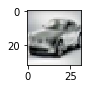

[204 206 152 ...,  46  43  46]


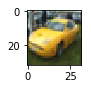

[ 85  91 100 ...,  39  33  29]


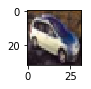

[101 106 108 ..., 181 177 173]


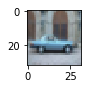

[187 223 238 ...,  84  79  81]


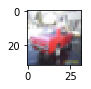

[ 76  89 105 ..., 127 126 127]


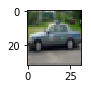

[41 47 73 ..., 61 64 71]


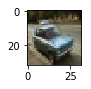

[186 169 167 ...,  96  97  99]


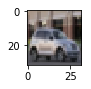

[171 116  70 ..., 225 223 224]


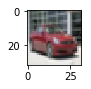

[ 93  94 109 ...,  68  62  60]


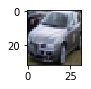

[185 179 181 ...,  51  52  55]


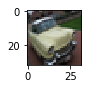

[159 140  55 ...,  69  61  49]


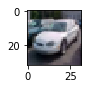

[138 136 137 ...,  32  31  34]


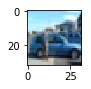

[ 8 10 12 ...,  1  1  1]


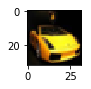

[223 221 222 ..., 108 109 110]


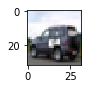

[71 75 70 ..., 37 37 31]


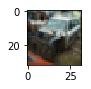

[ 61  63  58 ..., 104  96  98]


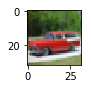

[163 108  19 ...,  77  75  74]


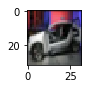

[131 128 129 ..., 202 203 202]


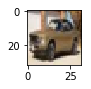

[108 103 103 ..., 105 155 185]


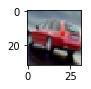

[250 246 246 ..., 166 164 164]


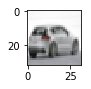

[ 48  15  13 ..., 131 134 136]


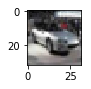

[ 56  53  50 ...,  74 131 161]


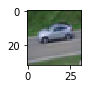

[66 67 71 ..., 41 42 45]


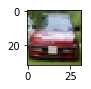

[36 36 44 ..., 56 56 56]


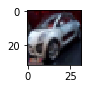

[136 131 131 ..., 151 146 152]


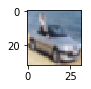

[13 25 25 ..., 95 84 55]


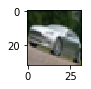

[ 44  53  59 ..., 161 155 148]


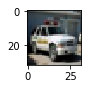

[42 39 41 ..., 90 91 94]


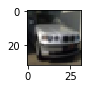

[255 255 255 ..., 255 255 255]


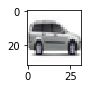

[ 43  58  49 ..., 152 150 144]


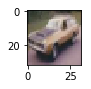

[44 52 54 ..., 43 44 45]


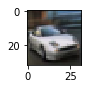

[176 207 209 ...,  81  81  81]


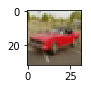

[139 124 131 ..., 158 159 159]


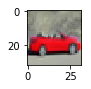

[118 120 123 ...,   1   1   1]


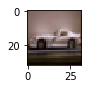

[ 58  63  61 ..., 116 122 105]


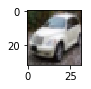

[111 107 109 ..., 177 176 170]


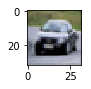

[  4   5   5 ..., 133 128 121]


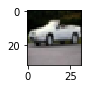

[ 89  81  85 ..., 122 119 122]


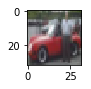

[ 39  64  18 ..., 103  95  94]


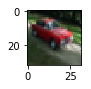

[255 252 253 ..., 255 255 255]


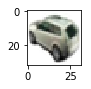

[255 253 254 ...,  69  70  67]


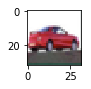

[ 10   7  19 ..., 177 175 174]


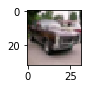

[117 113 114 ...,  71  71  71]


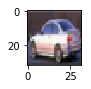

[255 255 217 ..., 158 152 151]


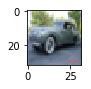

[65 68 64 ..., 84 83 82]


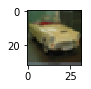

[186 188 189 ..., 132 124 124]


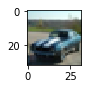

[189 186 186 ..., 160 161 162]


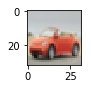

[245 241 242 ..., 167 165 171]


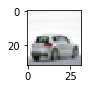

[  9  10  13 ..., 252 252 252]


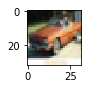

[233 232 231 ..., 233 232 229]


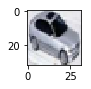

[175 143  53 ..., 132 128 127]


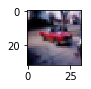

[ 15  11  38 ..., 227 226 227]


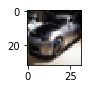

[147 146 132 ..., 181 182 187]


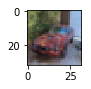

[254 251 251 ..., 167 165 163]


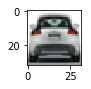

[167 167 166 ..., 176 177 176]


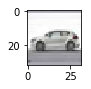

[ 84 117 118 ..., 190 190 191]


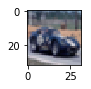

[ 89  70 107 ...,  56  17  16]


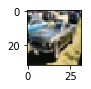

[ 1  1  6 ..., 53 51 50]


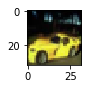

[180 200 216 ...,  28  17  14]


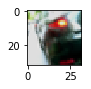

[  4   5  10 ..., 119 114 108]


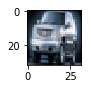

[12 26 29 ..., 25 29 19]


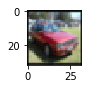

[ 18  25  32 ..., 113 109 149]


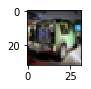

[186 182 184 ...,  26  24  27]


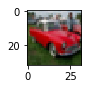

[225 232 239 ..., 149 148 147]


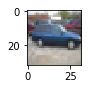

[ 93  66  58 ...,  69  96 114]


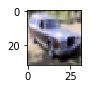

[101 101 103 ...,  44  69 102]


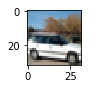

[236 224 187 ..., 253 253 253]


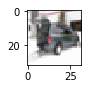

[ 30  92 134 ...,  89  90  92]


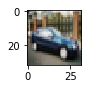

[ 64  37  37 ..., 219 230 235]


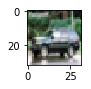

[76 66 50 ..., 44 47 48]


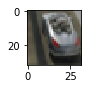

[ 2  4  5 ..., 40 42 51]


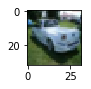

[219 217 217 ..., 211 210 209]


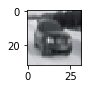

[112  97 131 ..., 176 170 175]


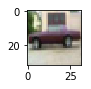

[104 107 115 ..., 126 125 127]


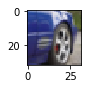

[175 176 176 ..., 144 145 150]


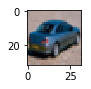

[ 51  73  89 ..., 148 156 156]


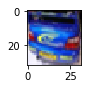

[237 240 247 ...,  86  89  88]


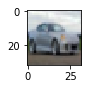

[152 169 192 ..., 104 103 108]


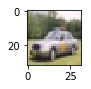

[31 33 32 ..., 50 57 55]


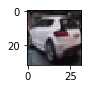

[107  98 113 ..., 137 141 149]


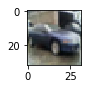

[27 31 39 ..., 54 51 49]


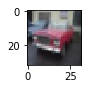

[177 176 176 ..., 171 174 172]


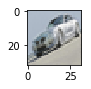

[106 147 143 ..., 187 185 182]


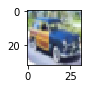

[183 181 198 ..., 185 177 172]


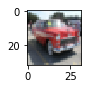

[206 237 255 ..., 127 141 141]


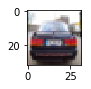

[206 193 149 ..., 144 139 135]


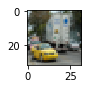

[147 155 158 ...,  96  92  97]


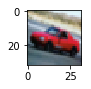

[ 81  65  73 ..., 125 123 120]


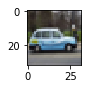

[176 176 179 ..., 118 114 111]


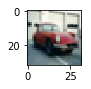

[255 255 255 ..., 133 137 140]


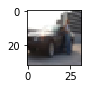

[165 161 169 ..., 223 222 220]


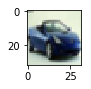

[36 30 32 ..., 67 67 65]


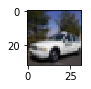

[200  80  79 ...,  83  80  74]


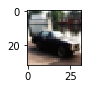

[245 248 243 ...,  60  64  71]


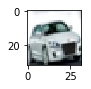

[130 128 129 ...,  69  66  64]


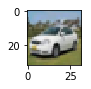

[141 136 135 ...,  85  86  89]


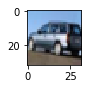

[159 160 174 ..., 121 113  98]


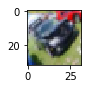

[ 42   6  11 ..., 133 153 141]


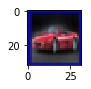

[231 240 245 ..., 194 212 226]


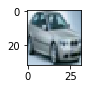

[143 127 123 ...,  75  68  67]


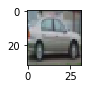

[ 92 100 119 ..., 153 149 146]


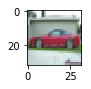

[ 22  33  37 ..., 113 104  79]


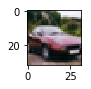

[255 255 255 ..., 254 254 254]


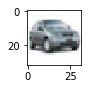

[208 234 229 ...,  78  79  77]


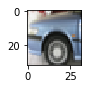

[255 255 255 ..., 212 203 179]


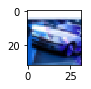

[86 91 97 ..., 83 83 82]


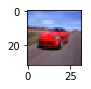

[ 81  78  73 ..., 163 163 164]


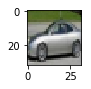

[166 117  88 ..., 162 173 179]


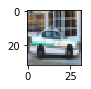

[250 252 249 ...,  27  27  30]


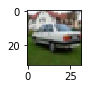

[45 41 21 ..., 70 77 79]


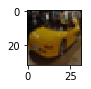

[246 243 242 ..., 236 238 238]


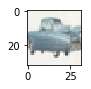

[221 217 217 ..., 154 160 163]


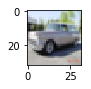

[17 21 47 ..., 19 34 70]


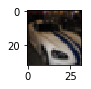

[247 248 250 ..., 113 120 127]


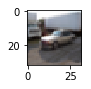

[163 173 183 ..., 208 255 255]


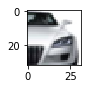

[208 186 128 ..., 100  97  97]


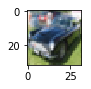

[ 47  56  78 ..., 111 105  99]


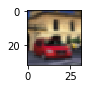

[220 227 232 ...,  58  57  56]


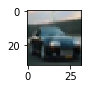

[119 123 111 ...,  47  48  52]


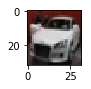

[ 38  40  40 ..., 101 100  94]


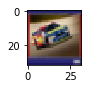

[125  65 100 ..., 145 145 145]


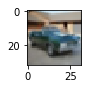

[73 80 97 ..., 22 35 48]


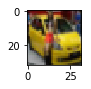

[  3   4   6 ..., 127 129 133]


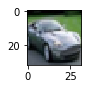

[98 51 37 ..., 87 82 74]


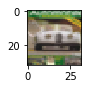

[ 46  62  38 ..., 221 222 223]


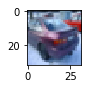

[132  97  99 ...,  26  28  25]


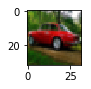

[186 184 188 ...,  23  45  77]


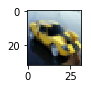

[102  99  95 ..., 212 173 130]


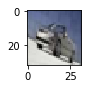

[202 200 200 ..., 124 116 122]


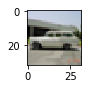

[117 111  84 ...,  61  46  47]


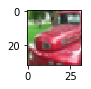

[123  60  20 ...,  80  78  77]


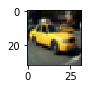

[255 252 253 ..., 254 254 254]


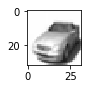

[117 113 115 ...,  94  90  91]


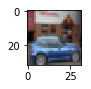

[ 55  58  62 ..., 162 160 157]


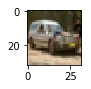

[ 63  67  73 ..., 250 250 249]


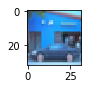

[195 154 164 ...,  87  89  88]


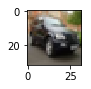

[150 148 148 ..., 220 217 221]


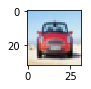

[255 255 254 ..., 254 254 255]


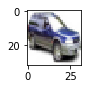

[184 181 189 ..., 103 110 116]


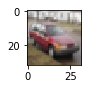

[151 150 151 ..., 237 236 230]


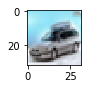

[  9  12   9 ..., 151 152 151]


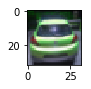

[204 203 187 ..., 156 191 214]


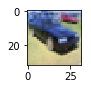

[172 175 175 ..., 254 254 254]


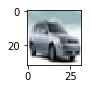

[ 60  75  84 ..., 139 139 134]


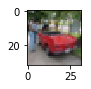

[238 230 227 ..., 160 157 153]


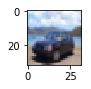

[118 106 112 ...,  73  70  61]


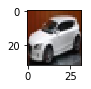

[244 227 128 ..., 136 121 115]


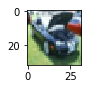

[84 79 76 ..., 58 61 60]


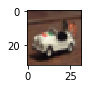

[159 159 158 ..., 129 129 135]


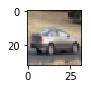

[151 159 169 ..., 132 118 115]


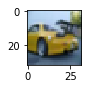

[251 249 250 ..., 180 179 176]


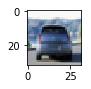

[ 74  69  46 ..., 221 218 219]


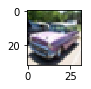

[255 255 255 ..., 255 255 255]


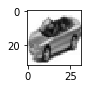

[ 64 144 174 ..., 138 142 150]


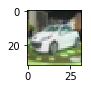

[199 206 211 ..., 145 145 160]


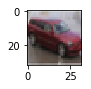

[112 114 119 ..., 154 155 156]


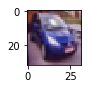

[ 36  44  57 ..., 108  89  84]


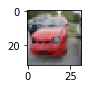

[130 108 102 ..., 117 118 120]


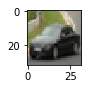

[255 255 255 ..., 255 255 255]


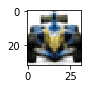

[ 68 123 203 ..., 143 144 144]


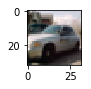

[ 61  61  61 ..., 128 131 124]


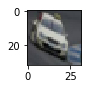

[ 90  94  87 ..., 159 159 159]


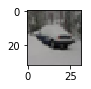

[ 40  54 119 ..., 172 173 178]


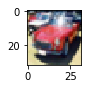

[107 121 136 ...,  63  50  28]


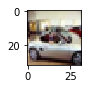

[ 14  12  25 ..., 121 121 120]


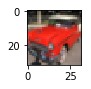

[ 40  57 147 ..., 198 194 194]


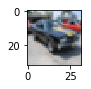

[117 134 139 ..., 138 137 136]


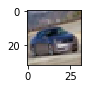

[255 214 135 ...,  99  94  87]


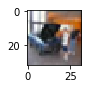

[116 120 126 ...,  82  84  81]


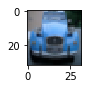

[71 60 74 ..., 68 69 68]


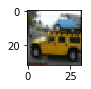

[250 254 211 ..., 215 255 254]


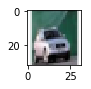

In [64]:
for i in img:
    print i
    plt.figure(figsize=(1,1))
    plt.imshow(i.reshape((3, 32,32)).transpose(1, 2, 0))
    plt.show()

In [126]:
A = np.array([[1, 2, 3], [5, 2, 7], [6, 3, 2]])
A1 = (A - np.mean(A, axis=0))
(A1.T.dot(A1)) / (3 - 1)

array([[ 13.        ,  -6.        ,   2.        ],
       [ -6.        ,   8.5       ,  -2.16666667],
       [  2.        ,  -2.16666667,   7.16666667]])

In [124]:
np.cov(A)

array([[ 1.        ,  1.        , -2.        ],
       [ 1.        ,  6.33333333, -0.66666667],
       [-2.        , -0.66666667,  4.33333333]])

In [127]:
A

array([[1, 2, 3],
       [5, 2, 7],
       [6, 3, 2]])

In [129]:
np.mean(A, axis=0)

array([ 4.        ,  2.33333333,  4.        ])